# MASTER THESIS - TIME SERIES MODELS

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Files" data-toc-modified-id="Files-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Files</a></span></li><li><span><a href="#Headers" data-toc-modified-id="Headers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Headers</a></span></li></ul></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#Augemented-Dickey-Fuller-Test" data-toc-modified-id="Augemented-Dickey-Fuller-Test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Augemented Dickey-Fuller Test</a></span></li><li><span><a href="#Original-Series" data-toc-modified-id="Original-Series-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Original Series</a></span></li><li><span><a href="#First-Differences" data-toc-modified-id="First-Differences-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>First Differences</a></span></li><li><span><a href="#Fractional-Differencing" data-toc-modified-id="Fractional-Differencing-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Fractional Differencing</a></span></li></ul></li><li><span><a href="#Causality" data-toc-modified-id="Causality-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Causality</a></span><ul class="toc-item"><li><span><a href="#Granger-Causality-Test" data-toc-modified-id="Granger-Causality-Test-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Granger-Causality Test</a></span></li><li><span><a href="#Testing-Original-Series" data-toc-modified-id="Testing-Original-Series-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Testing Original Series</a></span></li></ul></li><li><span><a href="#Cointegration" data-toc-modified-id="Cointegration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cointegration</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Yields" data-toc-modified-id="Train-Test-Yields-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Train-Test Yields</a></span></li><li><span><a href="#Train-Test-Scores" data-toc-modified-id="Train-Test-Scores-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Train-Test Scores</a></span></li><li><span><a href="#AR-Model" data-toc-modified-id="AR-Model-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>AR-Model</a></span></li><li><span><a href="#VAR-Model" data-toc-modified-id="VAR-Model-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>VAR-Model</a></span></li></ul></li><li><span><a href="#Back-Transform" data-toc-modified-id="Back-Transform-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Back-Transform</a></span><ul class="toc-item"><li><span><a href="#Nelson-Siegel" data-toc-modified-id="Nelson-Siegel-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Nelson Siegel</a></span></li><li><span><a href="#Naive-Model" data-toc-modified-id="Naive-Model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Naive Model</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Error" data-toc-modified-id="Error-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Error</a></span></li><li><span><a href="#Visual" data-toc-modified-id="Visual-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Visual</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

### Parameters
***

In [1]:
freq_all = ["day","week","month"]
freq = freq_all[0]

diff_all = ["no","yes"]
diff = diff_all[0]

print (f'Yield curve data frequency is {freq}-wise.')
print (f'Differencing of pc-scores: {diff}')

Yield curve data frequency is day-wise.
Differencing of pc-scores: no


In [2]:
#pred_start = "2017-12-01"
%store -r pred_start

In [3]:
model_all = ["ar","var"]
model = model_all[1]

lag = 10
steps = 5

print (f'The {model}-model with {lag} lags is selected.')
print (f'The prediction is made for {pred_start} until {steps} {freq}s into the future.')

The var-model with 10 lags is selected.
The prediction is made for 2018-11-21 until 5 days into the future.


### Import
***

#### Packages

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [5]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.6f}'.format

In [6]:
import statsmodels.api as sm

# Autocorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationarity & causality
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Model & evaluation
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.ar_model import AR

# Random Walk
from random import seed
from random import random
from random import gauss

In [7]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.pyplot import cm
import seaborn as sns

years = mdates.YearLocator()
months = mdates.MonthLocator()

years_fmt = mdates.DateFormatter("%Y")
months_fmt = mdates.DateFormatter("%Y-%m")
days_fmt = mdates.DateFormatter("%Y-%m-%d")

%config InlineBackend.figure_format ="retina"

In [8]:
import sys, os

def blockPrint(): sys.stdout = open(os.devnull, 'w')
def enablePrint(): sys.stdout = sys.__stdout__
    
blockPrint()

#### Files

In [9]:
filepath_tenors = "C:/Users/bernh/Jupyter scripts/04 Master Thesis/Data/01_input/"
filepath_spot = "C:/Users/bernh/Jupyter scripts/04 Master Thesis/Data/02_cleaned/"

filename_spot = "spot_"+str(freq)+".csv"
filename_ns = "nelson_siegel_"+str(freq)+".csv"
filename_tenors = "tenors.csv"

In [10]:
# Actual spot rates -----------------------------------------------------------------------------------
spot = pd.read_csv(filepath_spot + filename_spot, index_col = 0)
spot.columns.name = "spot_"+str(freq)
spot.index = pd.to_datetime(spot.index)

# Nelson siegel ---------------------------------------------------------------------------------------
nelson_siegel = pd.read_csv(filepath_spot + filename_ns, index_col = 0)
nelson_siegel.columns.name = "nelson_siegel_"+str(freq)
nelson_siegel.index = pd.to_datetime(nelson_siegel.index)

# Tenors list -----------------------------------------------------------------------------------------
tenors = pd.read_csv(filepath_tenors + "tenors.csv", index_col = 0)
tenors.columns.name = "tenors"

In [11]:
spot.iloc[:5,:5]

spot_day,3M,6M,1Y,2Y,3Y
2005-01-03,2.109629,2.151024,2.239782,2.430961,2.626467
2005-01-04,2.055906,2.115073,2.231982,2.457144,2.667102
2005-01-05,2.064858,2.126695,2.248179,2.479969,2.694019
2005-01-06,2.060515,2.107919,2.207488,2.415567,2.622265
2005-01-07,2.048016,2.092720,2.187889,2.390159,2.593648


In [12]:
nelson_siegel.iloc[:5,:5]

nelson_siegel_day,BETA0,BETA1,BETA2,BETA3,TAU1
2005-01-03,4.961704,-2.890864,-0.111447,-1.415937,3.395999
2005-01-04,4.909715,-2.913265,-0.025017,-1.205345,3.337923
2005-01-05,4.913796,-2.911350,0.009475,-1.171742,3.317917
2005-01-06,4.845211,-2.829891,0.017249,-1.295412,3.335752
2005-01-07,4.814018,-2.808103,0.009410,-1.320543,3.342847


In [13]:
tenors.head()

tenors,MAT_STR,MAT_NUM
0,3M,0.250000
1,6M,0.500000
2,1Y,1.000000
3,2Y,2.000000
4,3Y,3.000000


#### Headers

In [14]:
cols = nelson_siegel.columns
cols_diff = cols+"_diff"
cols_cum = cols+"_cum"
cols_frac = cols+"_frac"
cols_len = len(cols)

In [15]:
instances = nelson_siegel.shape[0]

### Stationarity
***

#### Augemented Dickey-Fuller Test
The Augmented Dickey-Fuller (ADF) test can be applied, to statistically testify stationarity. The ADF basically just regresses the first differences (= Y-variable) on the original time series (= X-variable). The corresponding t-statistic gives the ADF-statistic. 
- <b>Non-Stationary:</b> If the original time series cannot signficantly help to predict the first differences, the original time series is non-stationary. 
- <b>Stationary:</b> A perfect stationary time series would be mean-reverting immediately, and thus the original time series would be able to predict the next change.

In [16]:
def ad_fuller(df, cols, confidence = "5%"):

    adf_stat = []
    threshold = []
    p_val = []
    stationary = []

    for i in cols:
        model = adfuller(df[i])
           
        adf_stat.append(model[0])
        threshold.append(model[4][confidence])
        p_val.append(model[1])
           
        if model[0] < model[4][confidence]: x = "stat"
        else: x = "non-stat"         
        stationary.append(x)

    eval_df = pd.DataFrame(np.zeros([len(cols),0]), index = cols)
    
    eval_df["adf_stat"] = adf_stat
    eval_df["p_val"] = p_val
    eval_df["result"] = stationary
    eval_df["crit_"+confidence] = model[4][confidence]
             
    return eval_df

#### Original Series

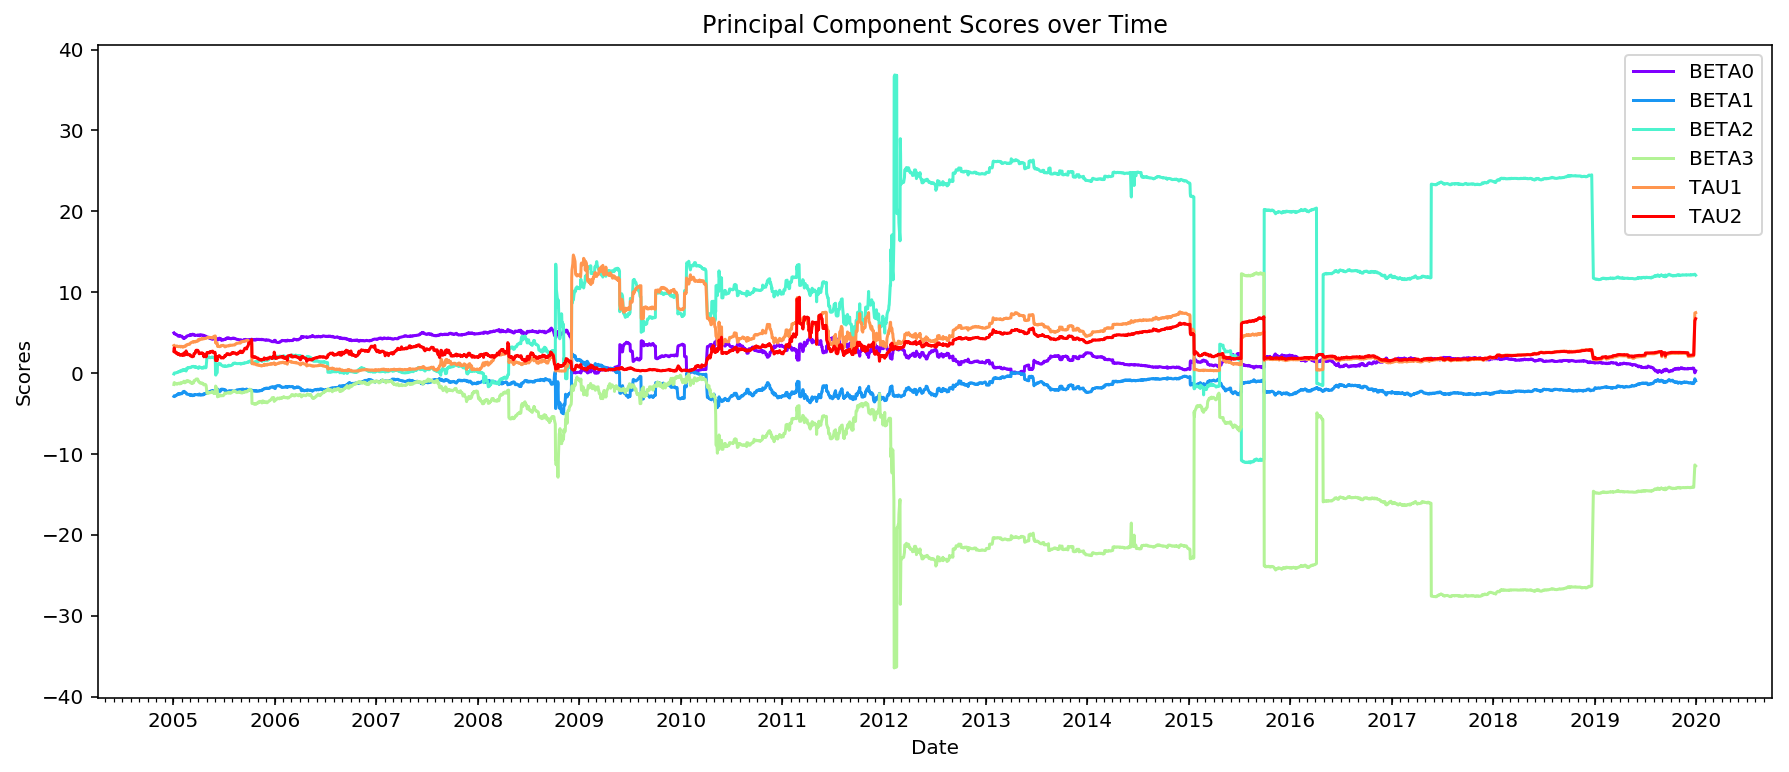

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (15,6))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols,color):
    plt.plot(nelson_siegel[i],c=c)

# Format axis --------------------------------------------------
ax.set_title ("Principal Component Scores over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks -------------------------------------------------
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

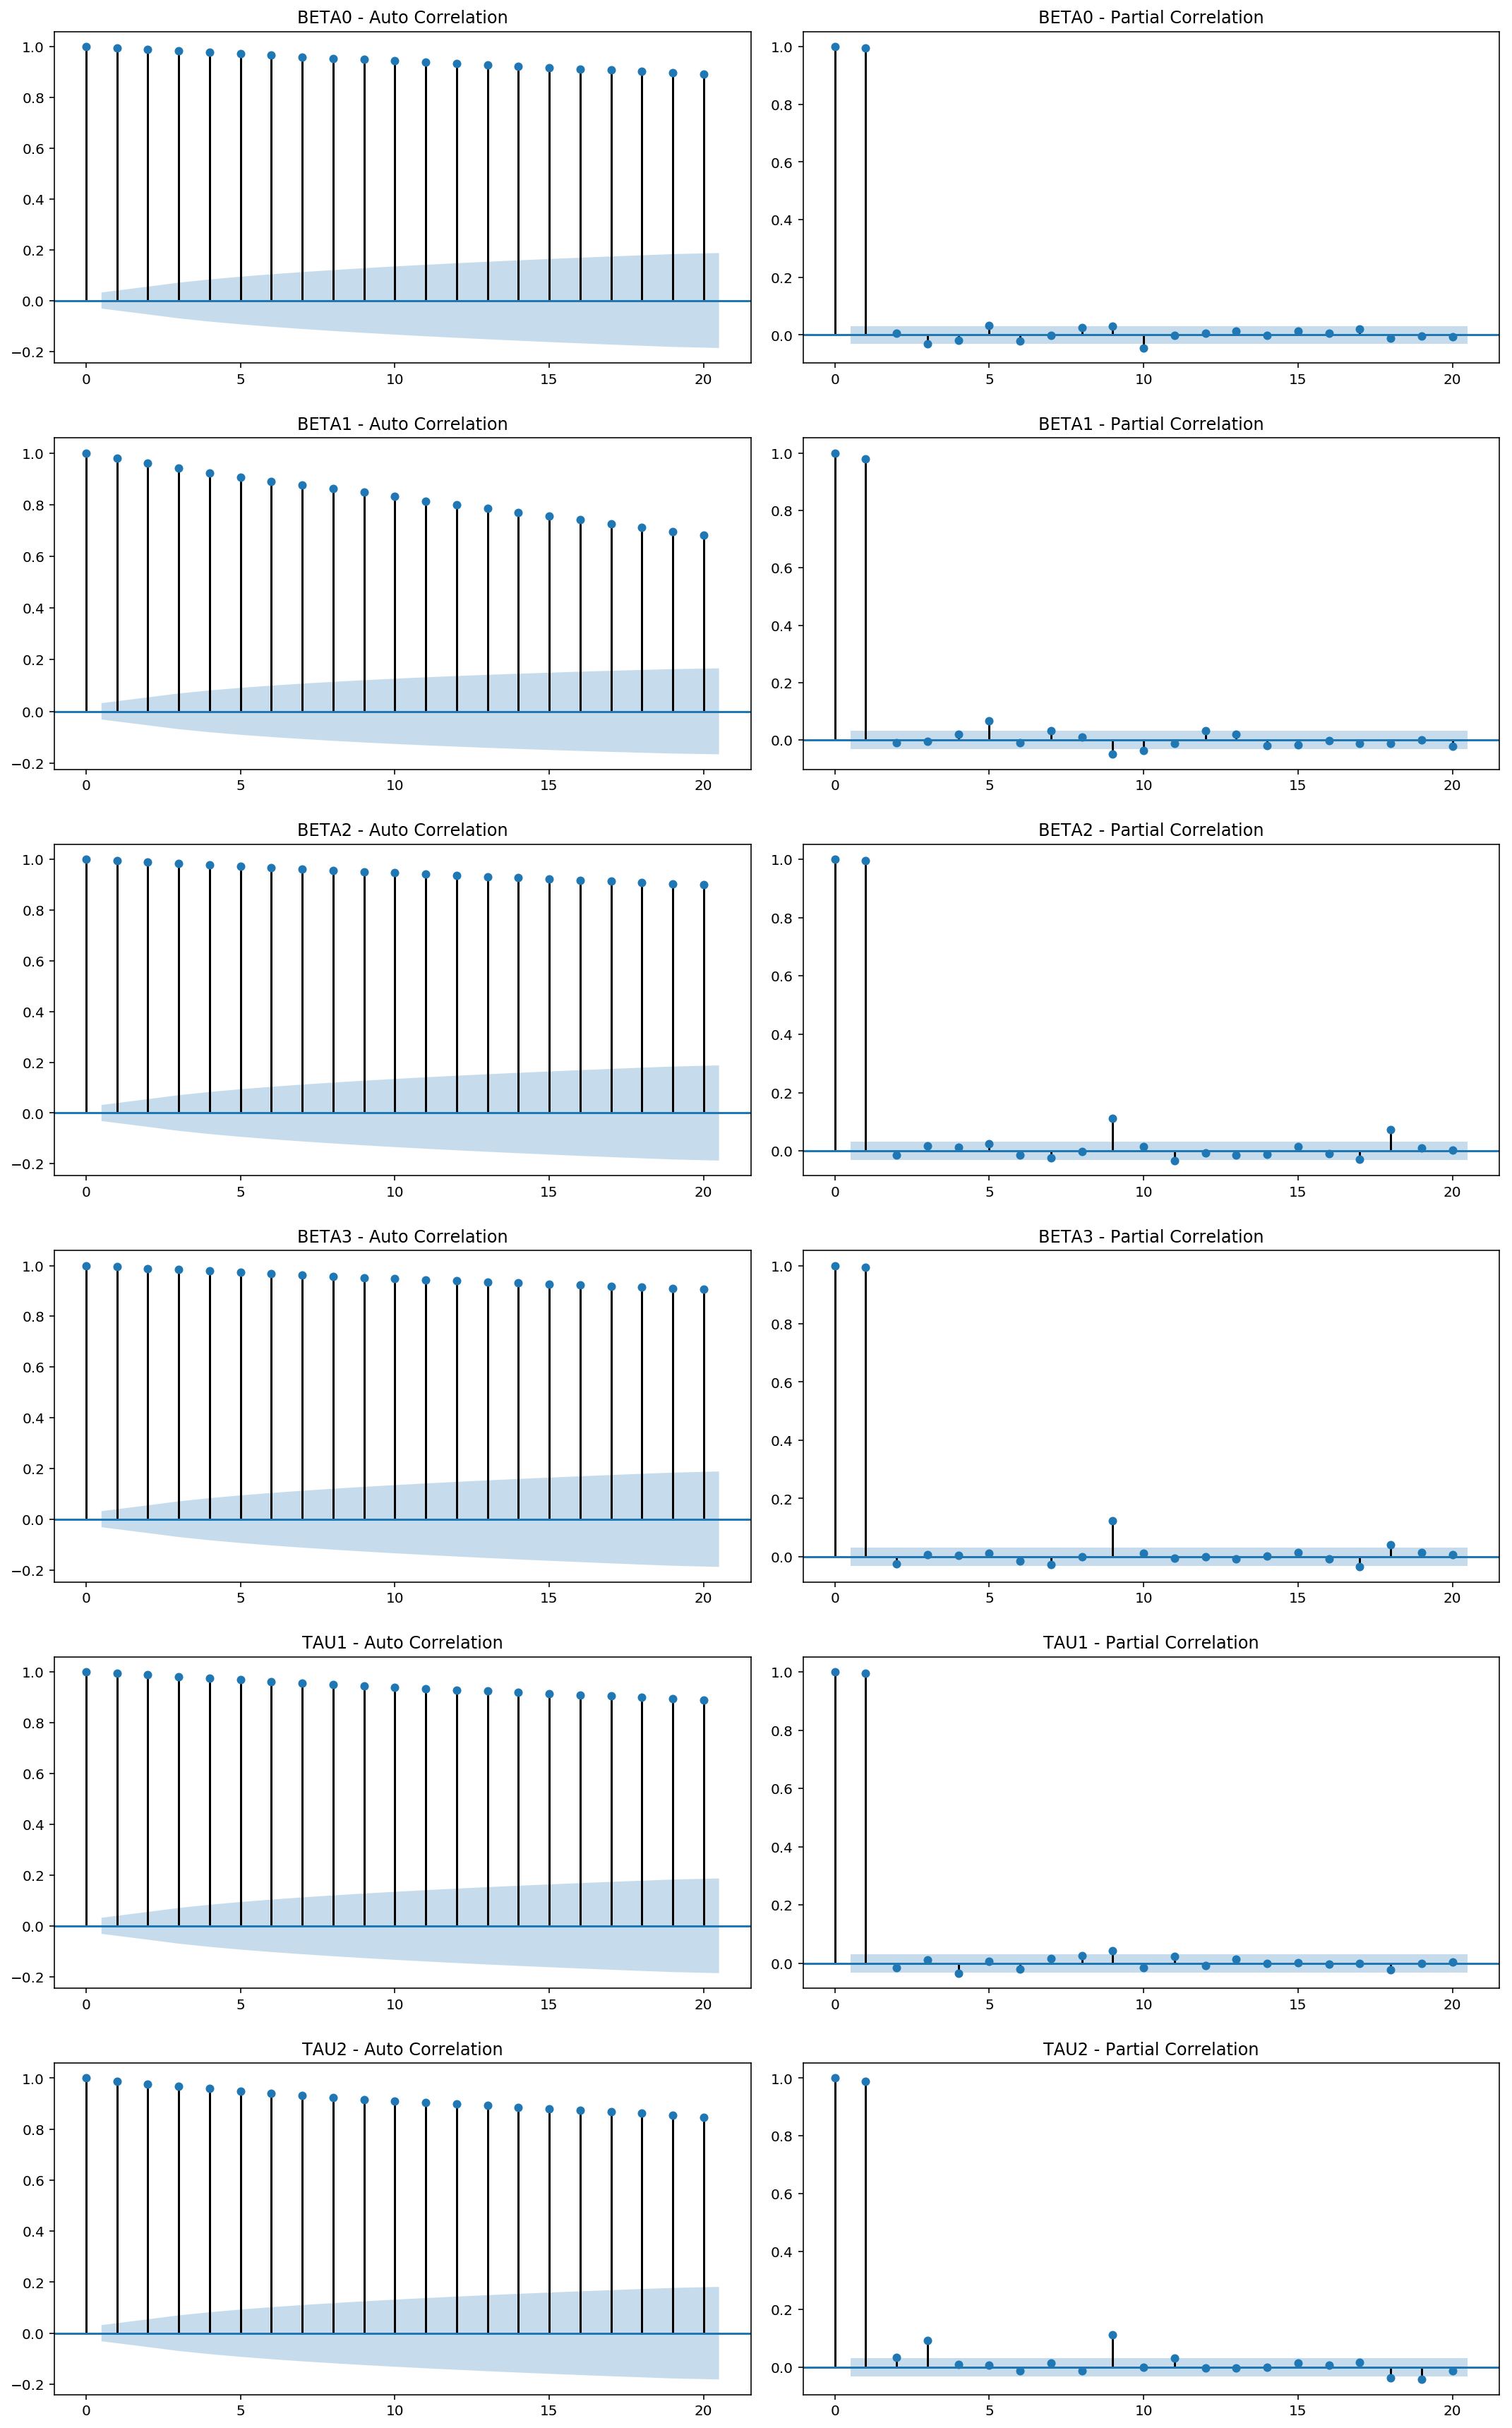

In [18]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols):
    plot_acf(nelson_siegel[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(nelson_siegel[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [19]:
ad_fuller(df = nelson_siegel, cols = cols, confidence = "5%")

,adf_stat,p_val,result,crit_5%
nelson_siegel_day,,,,
BETA0,-3.160444,0.022392,stat,-2.862300
BETA1,-5.899319,0.000000,stat,-2.862300
BETA2,-3.013477,0.033655,stat,-2.862300
BETA3,-2.994801,0.035383,stat,-2.862300
TAU1,-3.224146,0.018629,stat,-2.862300
TAU2,-3.620452,0.005382,stat,-2.862300


<div class="alert alert-block alert-info">
<b>Comment:</b> Principal component scores show trends over time, and exhibit significant autocorrelation with the first lag. Also ADF-test shows that all principal component scores are non-stationary, and thus have to be transformed. The easiest approach is to take first differences, which can eliminate any linear trend.
</div>

#### First Differences

In [20]:
for i in cols:
    nelson_siegel[i+"_diff"] = nelson_siegel[i].diff()    
    
nelson_siegel = nelson_siegel.iloc[1:]
nelson_siegel.head()

nelson_siegel_day,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2,BETA0_diff,BETA1_diff,BETA2_diff,BETA3_diff,TAU1_diff,TAU2_diff
2005-01-04,4.909715,-2.913265,-0.025017,-1.205345,3.337923,3.099315,-0.051989,-0.022401,0.086431,0.210592,-0.058075,0.376034
2005-01-05,4.913796,-2.911350,0.009475,-1.171742,3.317917,3.090908,0.004081,0.001915,0.034492,0.033603,-0.020006,-0.008407
2005-01-06,4.845211,-2.829891,0.017249,-1.295412,3.335752,2.579415,-0.068585,0.081459,0.007774,-0.123670,0.017835,-0.511494
2005-01-07,4.814018,-2.808103,0.009410,-1.320543,3.342847,2.549312,-0.031193,0.021788,-0.007838,-0.025131,0.007095,-0.030102
2005-01-10,4.803630,-2.812945,0.027992,-1.304500,3.327327,2.552352,-0.010388,-0.004843,0.018582,0.016043,-0.015520,0.003040


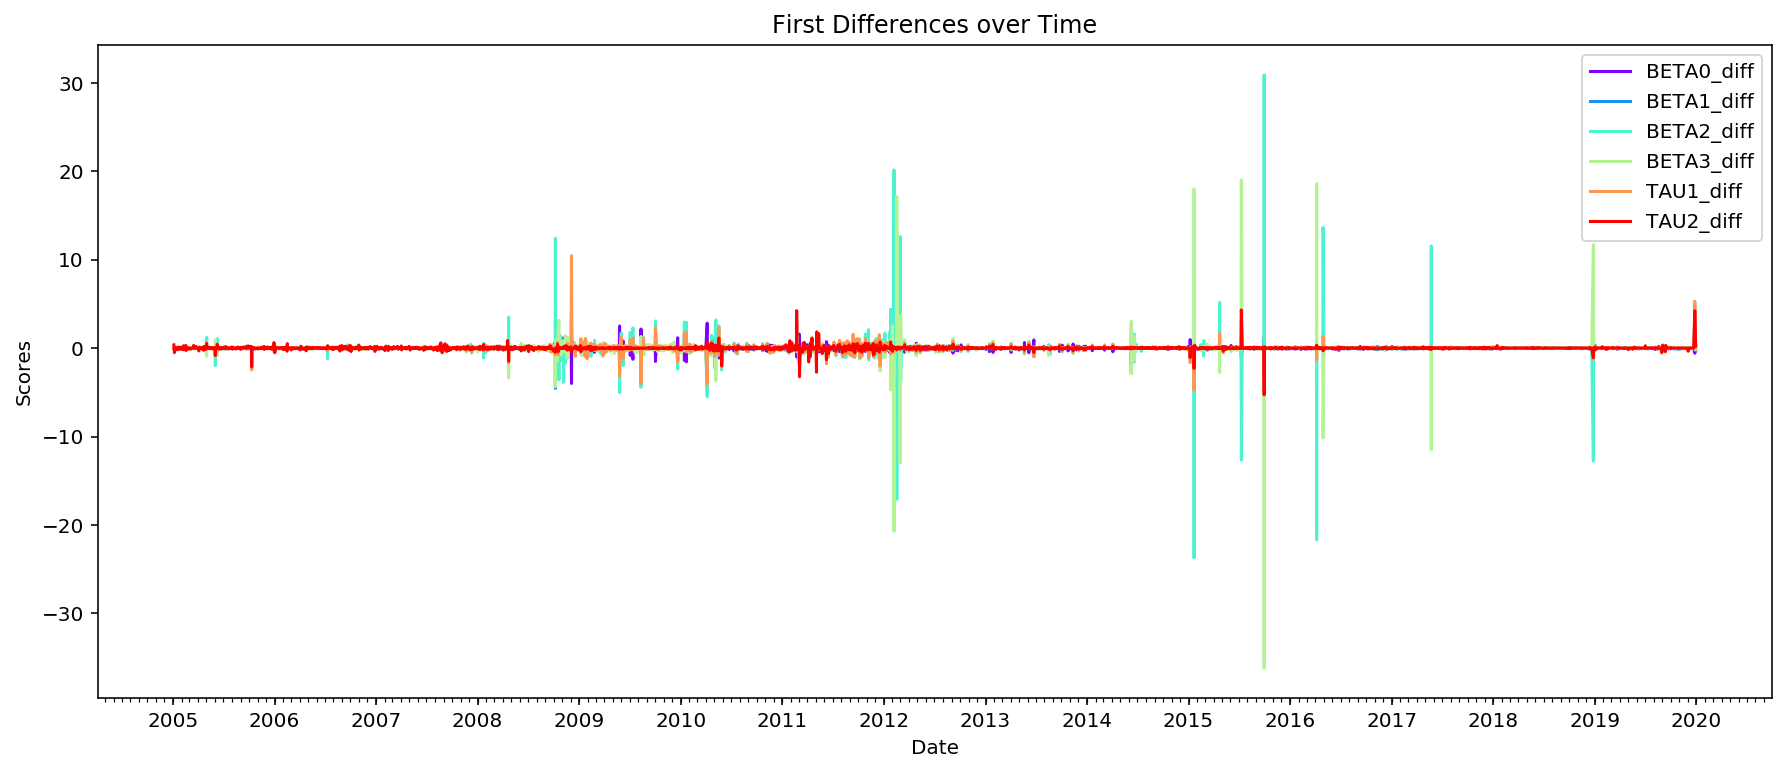

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (15,6))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols_diff,color):
    plt.plot(nelson_siegel[i],c=c)

# Format axis -------------------------------------------------
ax.set_title ("First Differences over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks ------------------------------------------------
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

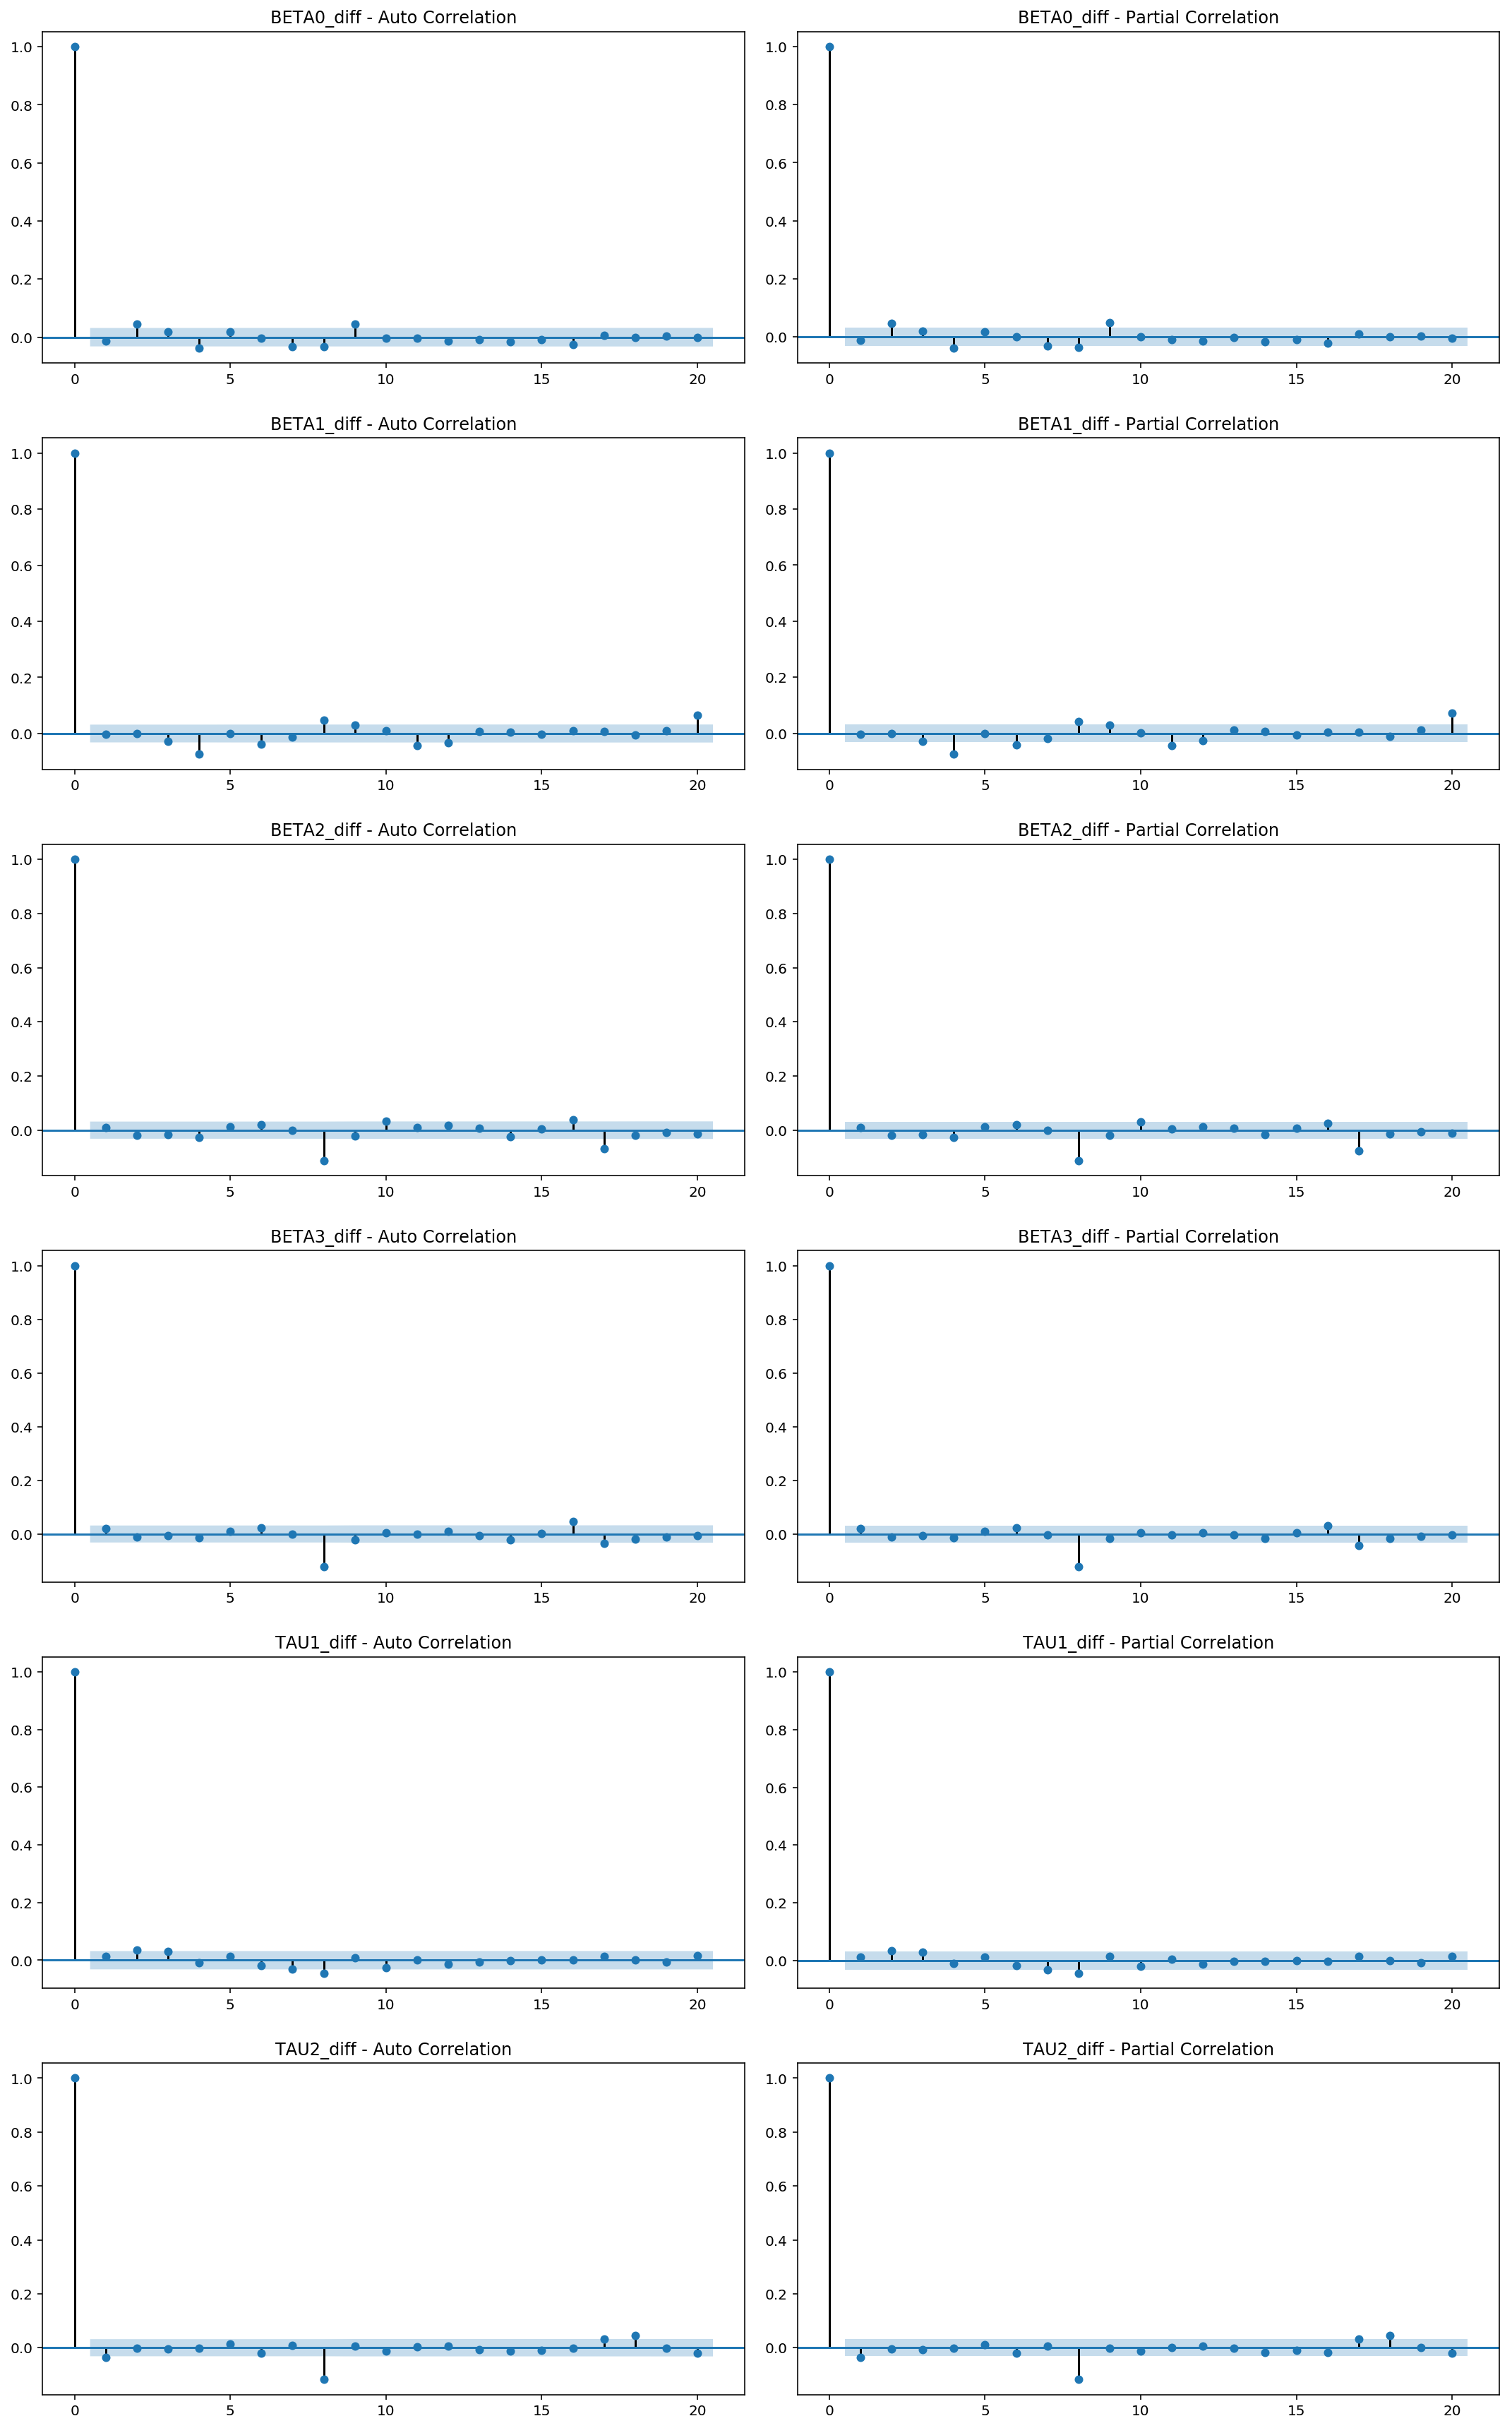

In [22]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols_diff):
    plot_acf(nelson_siegel[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(nelson_siegel[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [23]:
ad_fuller(df = nelson_siegel, cols = cols_diff, confidence = "5%")

,adf_stat,p_val,result,crit_5%
nelson_siegel_day,,,,
BETA0_diff,-20.574208,0.000000,stat,-2.862301
BETA1_diff,-13.107792,0.000000,stat,-2.862301
BETA2_diff,-16.252790,0.000000,stat,-2.862301
BETA3_diff,-24.360849,0.000000,stat,-2.862301
TAU1_diff,-22.586189,0.000000,stat,-2.862301
TAU2_diff,-11.530941,0.000000,stat,-2.862301


<div class="alert alert-block alert-info">
<b>Comment:</b> After taking the frist differences, all PC-scpres seem to be stationary by applying ADF. Additionally the autocorrelation graphs show, that any significance of lag-terms has been removed through this transformation as well.
</div>

#### Fractional Differencing

In [24]:
def fast_fracdiff(x, d):
    import pylab as pl
    T = len(x)
    np2 = int(2 ** np.ceil(np.log2(2 * T - 1)))
    k = np.arange(1, T) 
    b = (1,) + tuple(np.cumprod((k - d - 1) / k))
    z = (0,) * (np2 - T)
    z1 = b + z
    z2 = tuple(x) + z
    dx = pl.ifft(pl.fft(z1) * pl.fft(z2))
    return np.real(dx[0:T])

In [25]:
for i in cols:
    nelson_siegel[i+"_frac"] = fast_fracdiff(x = nelson_siegel[i], d = 0.15)

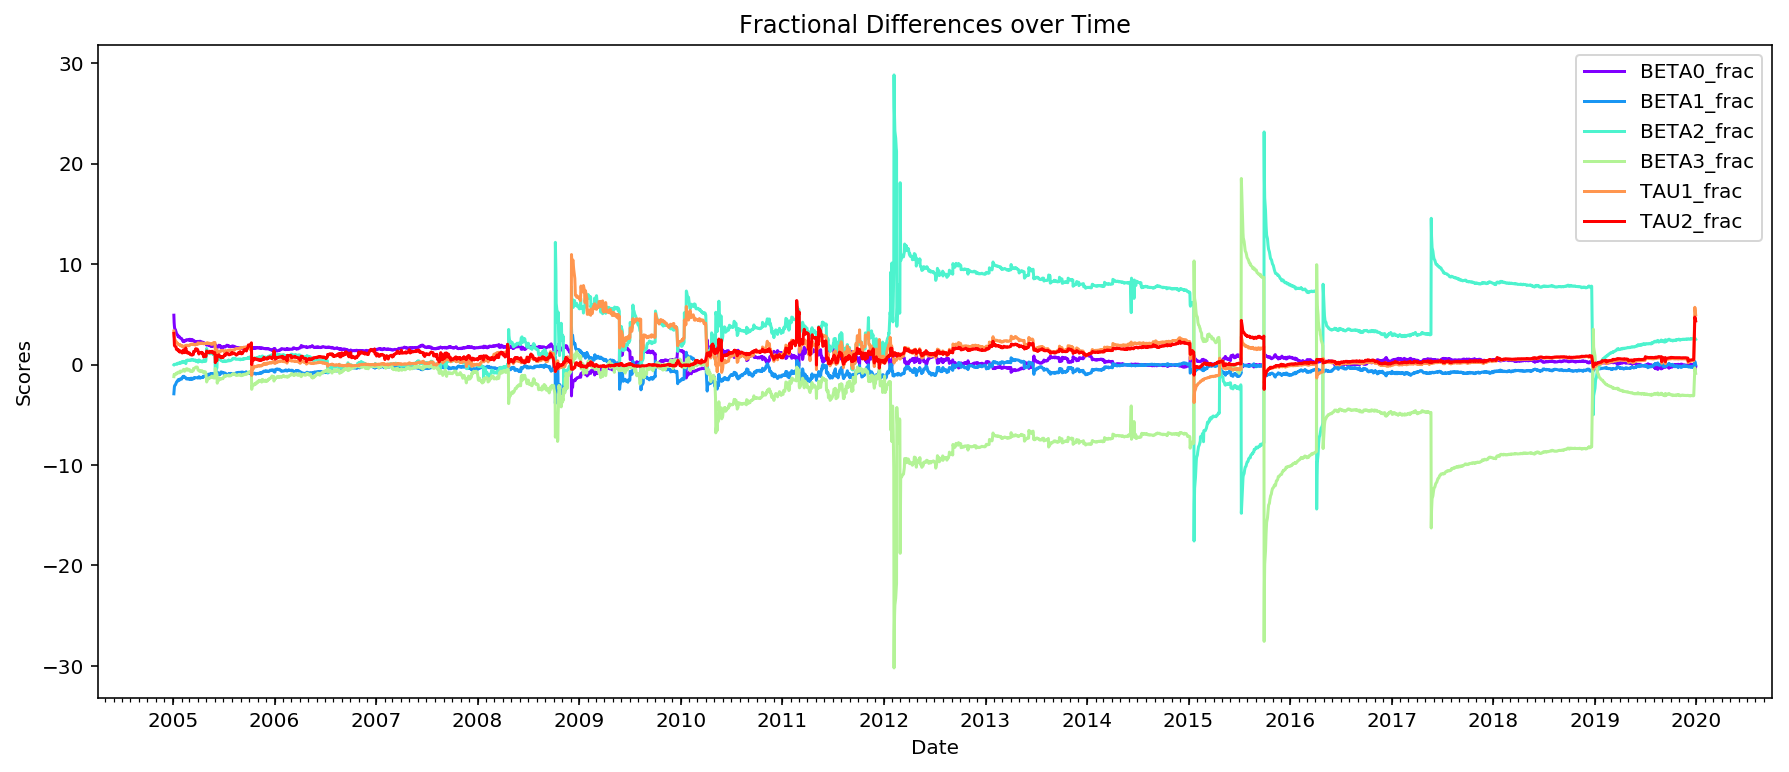

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (15,6))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols_frac,color):
    plt.plot(nelson_siegel[i],c=c)

# Format axis -------------------------------------------------------------
ax.set_title ("Fractional Differences over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks ------------------------------------------------------------
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

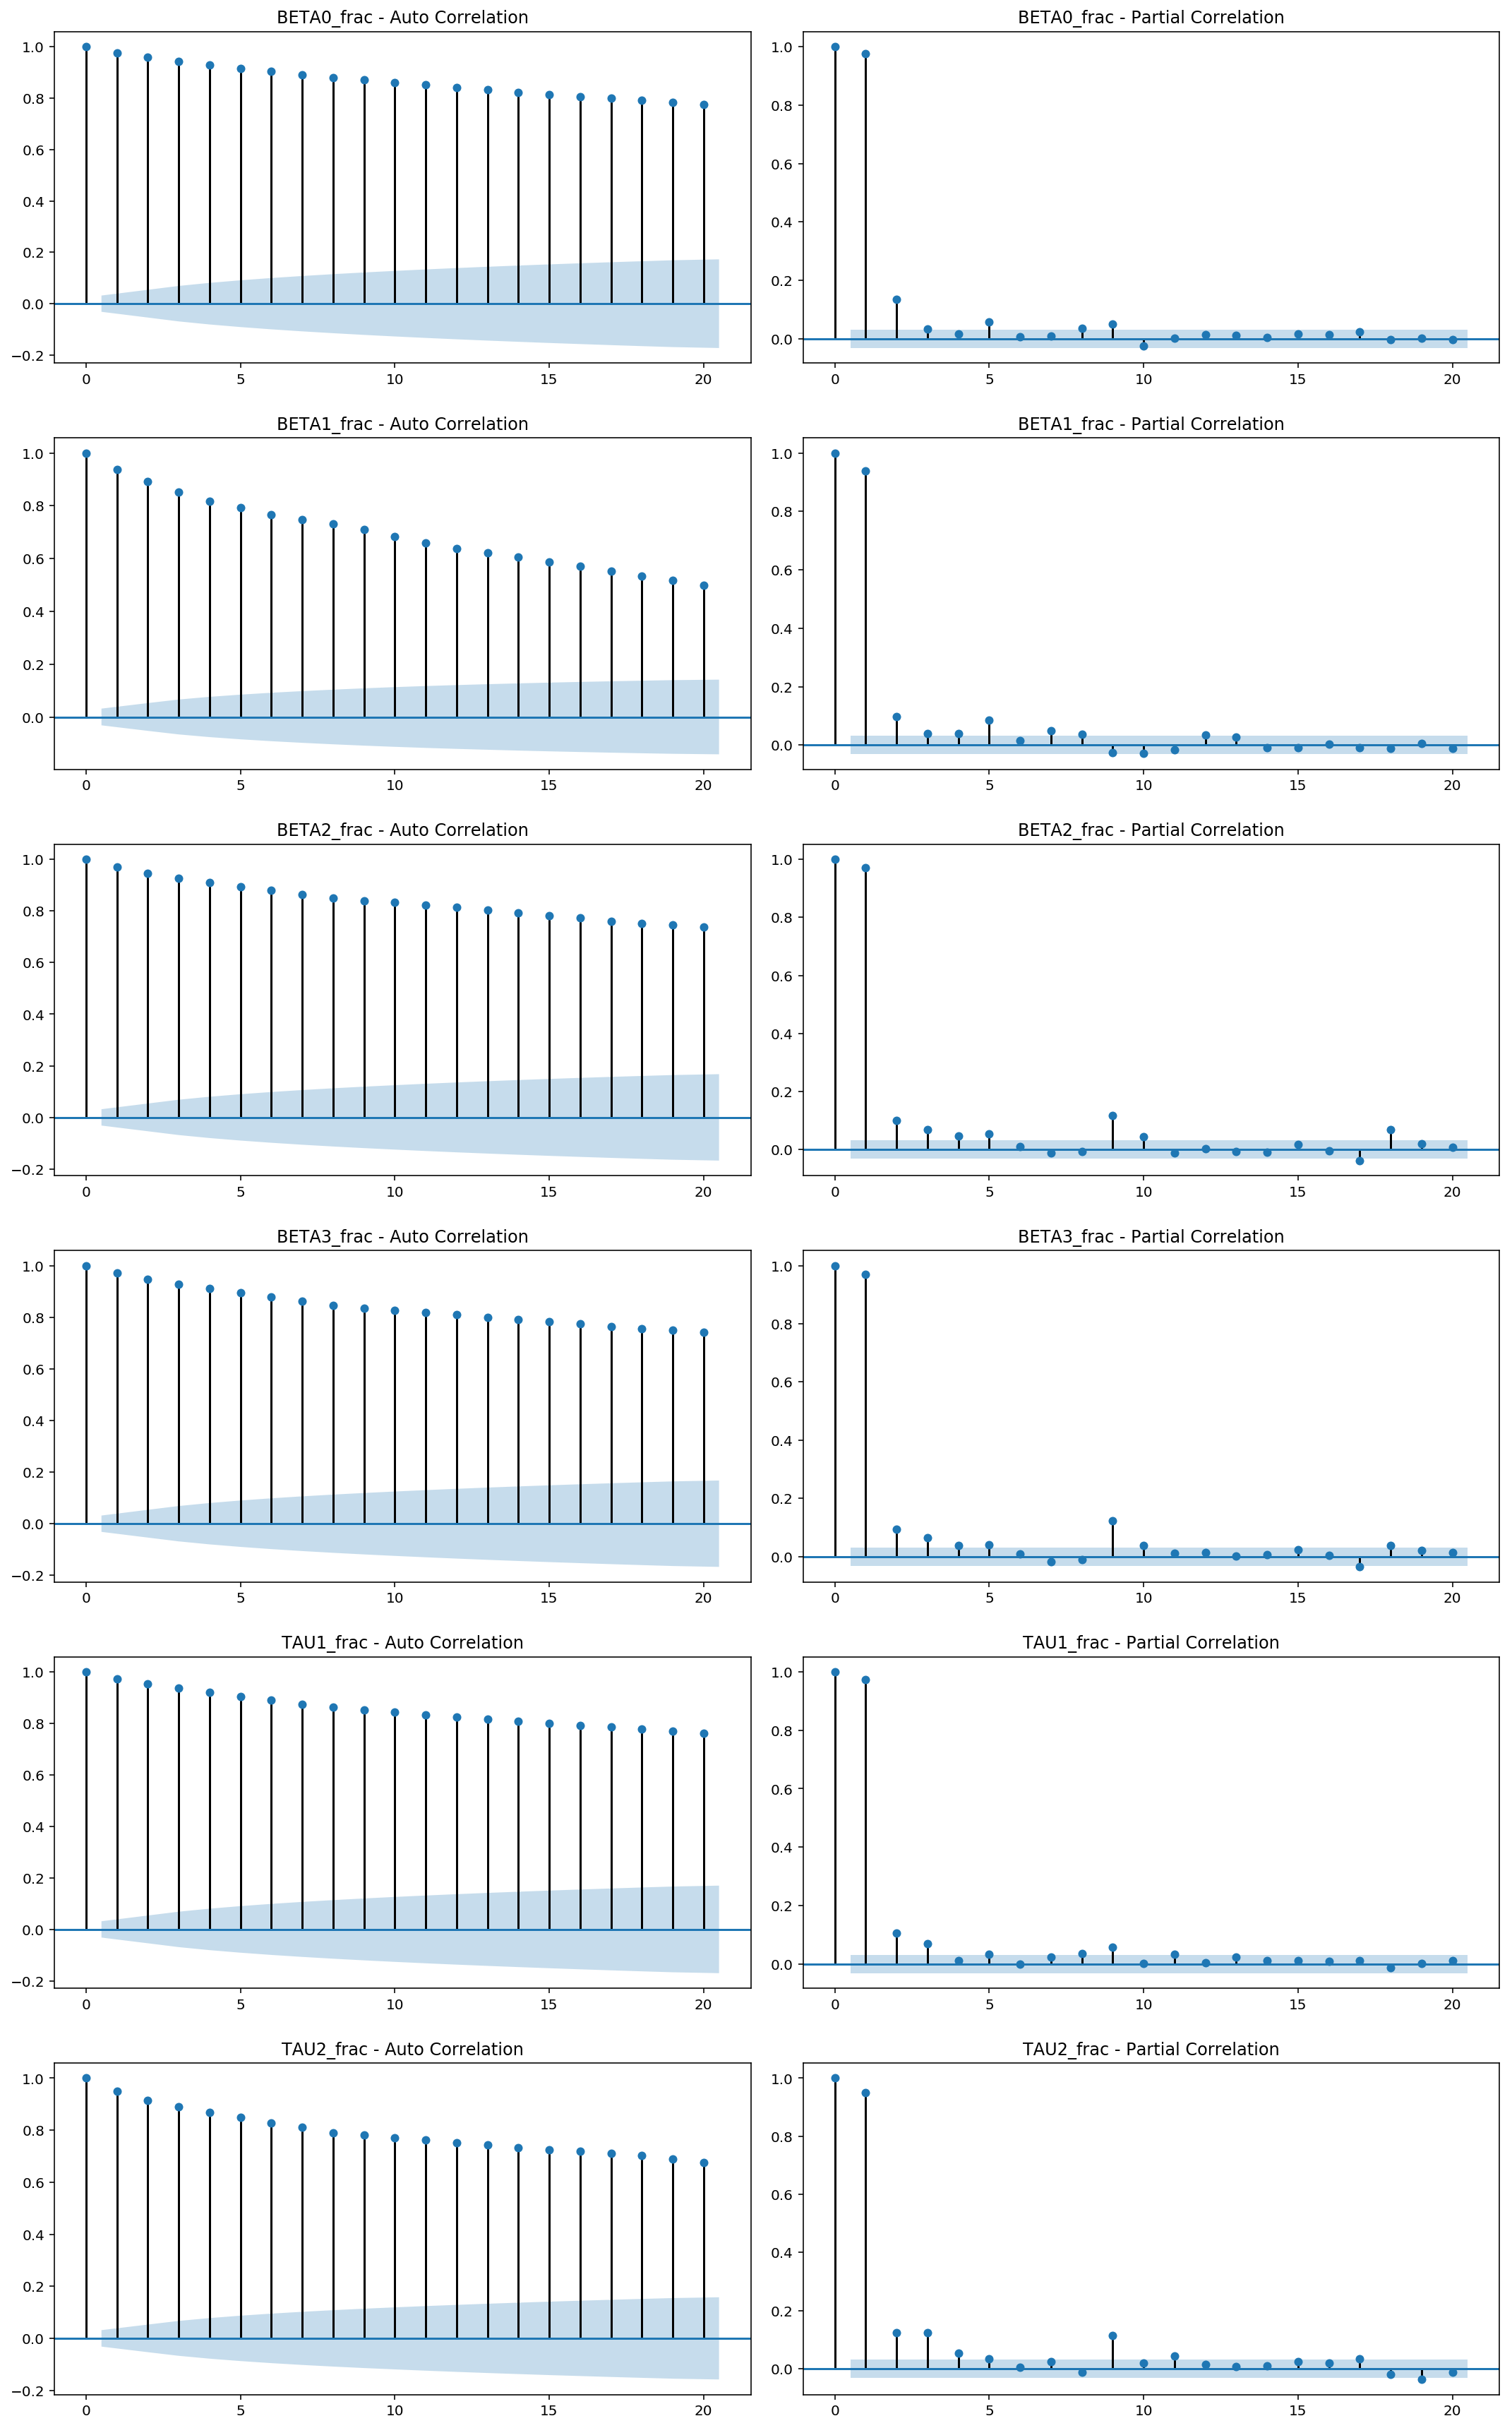

In [27]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols_frac):
    plot_acf(nelson_siegel[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(nelson_siegel[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [28]:
ad_fuller(df = nelson_siegel, cols = cols_frac, confidence = "5%")

,adf_stat,p_val,result,crit_5%
nelson_siegel_day,,,,
BETA0_frac,-4.911499,0.000033,stat,-2.862300
BETA1_frac,-7.554273,0.000000,stat,-2.862300
BETA2_frac,-4.633532,0.000112,stat,-2.862300
BETA3_frac,-4.977316,0.000025,stat,-2.862300
TAU1_frac,-4.863286,0.000041,stat,-2.862300
TAU2_frac,-4.790534,0.000057,stat,-2.862300


### Causality
***

#### Granger-Causality Test
In order for a Vector Autoregressive (VAR) model to work, the interdependencies to the endogenous variables (PC1, PC2, PC3) should be significant. To testify this assumption, the Granger Causality test can be applied. It basically regresses Y on a specified number of its own lags, and adds the first lag of another endogenous variable. An f-test is being computed that states, if any of the added endogenous variables is significant enough to help forecasting Y.

In [29]:
def granger_causality(df, Y, X, lag, test= "ssr_ftest", alpha = 0.05):

    model = grangercausalitytests(df[[Y, X]], maxlag = lag, verbose = False)
    
    lags = ["lag_"+str(i) for i in range(1, lag+1)]
    f_stat = [model[i][0][test][0] for i in range(1, lag+1)]
    p_val  = [model[i][0][test][1] for i in range(1, lag+1)]
    sign = [1 if i <alpha else 0 for i in p_val]
    
    # Output
    output_1 = pd.DataFrame(f_stat, columns = ["f_stat"], index = lags).T
    output_1["f_stat"] = Y+"_"+X
    output_1 = output_1.set_index("f_stat")
    
    output_2 = pd.DataFrame(p_val, columns = ["p_val"], index = lags).T
    output_2["p_val"] = Y+"_"+X
    output_2 = output_2.set_index("p_val")
    
    output_3 = pd.DataFrame(sign, columns = ["sign"], index = lags).T
    output_3["sign"] = Y+"_"+X
    output_3 = output_3.set_index("sign")
    
    return output_1, output_2, output_3

#### Testing Original Series

In [30]:
comb_x = [i if i != j else None for j in cols for i in cols]
comb_y = [j if i != j else None for j in cols for i in cols]

comb_x = list(filter(None, comb_x))
comb_y = list(filter(None, comb_y))

In [31]:
granger_df = pd.DataFrame()

for x,y in zip (comb_x,comb_y):
    new = granger_causality(nelson_siegel, Y = y, X = x, lag = 5)[2]
    granger_df = pd.concat([granger_df, new], axis = 0)
    
granger_df.index.name = None
granger_df

,lag_1,lag_2,lag_3,lag_4,lag_5
BETA0_BETA1,1,1,1,1,1
BETA0_BETA2,0,0,0,0,0
BETA0_BETA3,1,1,0,0,0
BETA0_TAU1,0,1,1,1,1
BETA0_TAU2,0,1,1,0,0
BETA1_BETA0,0,0,1,1,1
BETA1_BETA2,0,0,0,0,0
BETA1_BETA3,0,0,0,0,0
BETA1_TAU1,0,0,1,1,1
BETA1_TAU2,0,0,0,0,0


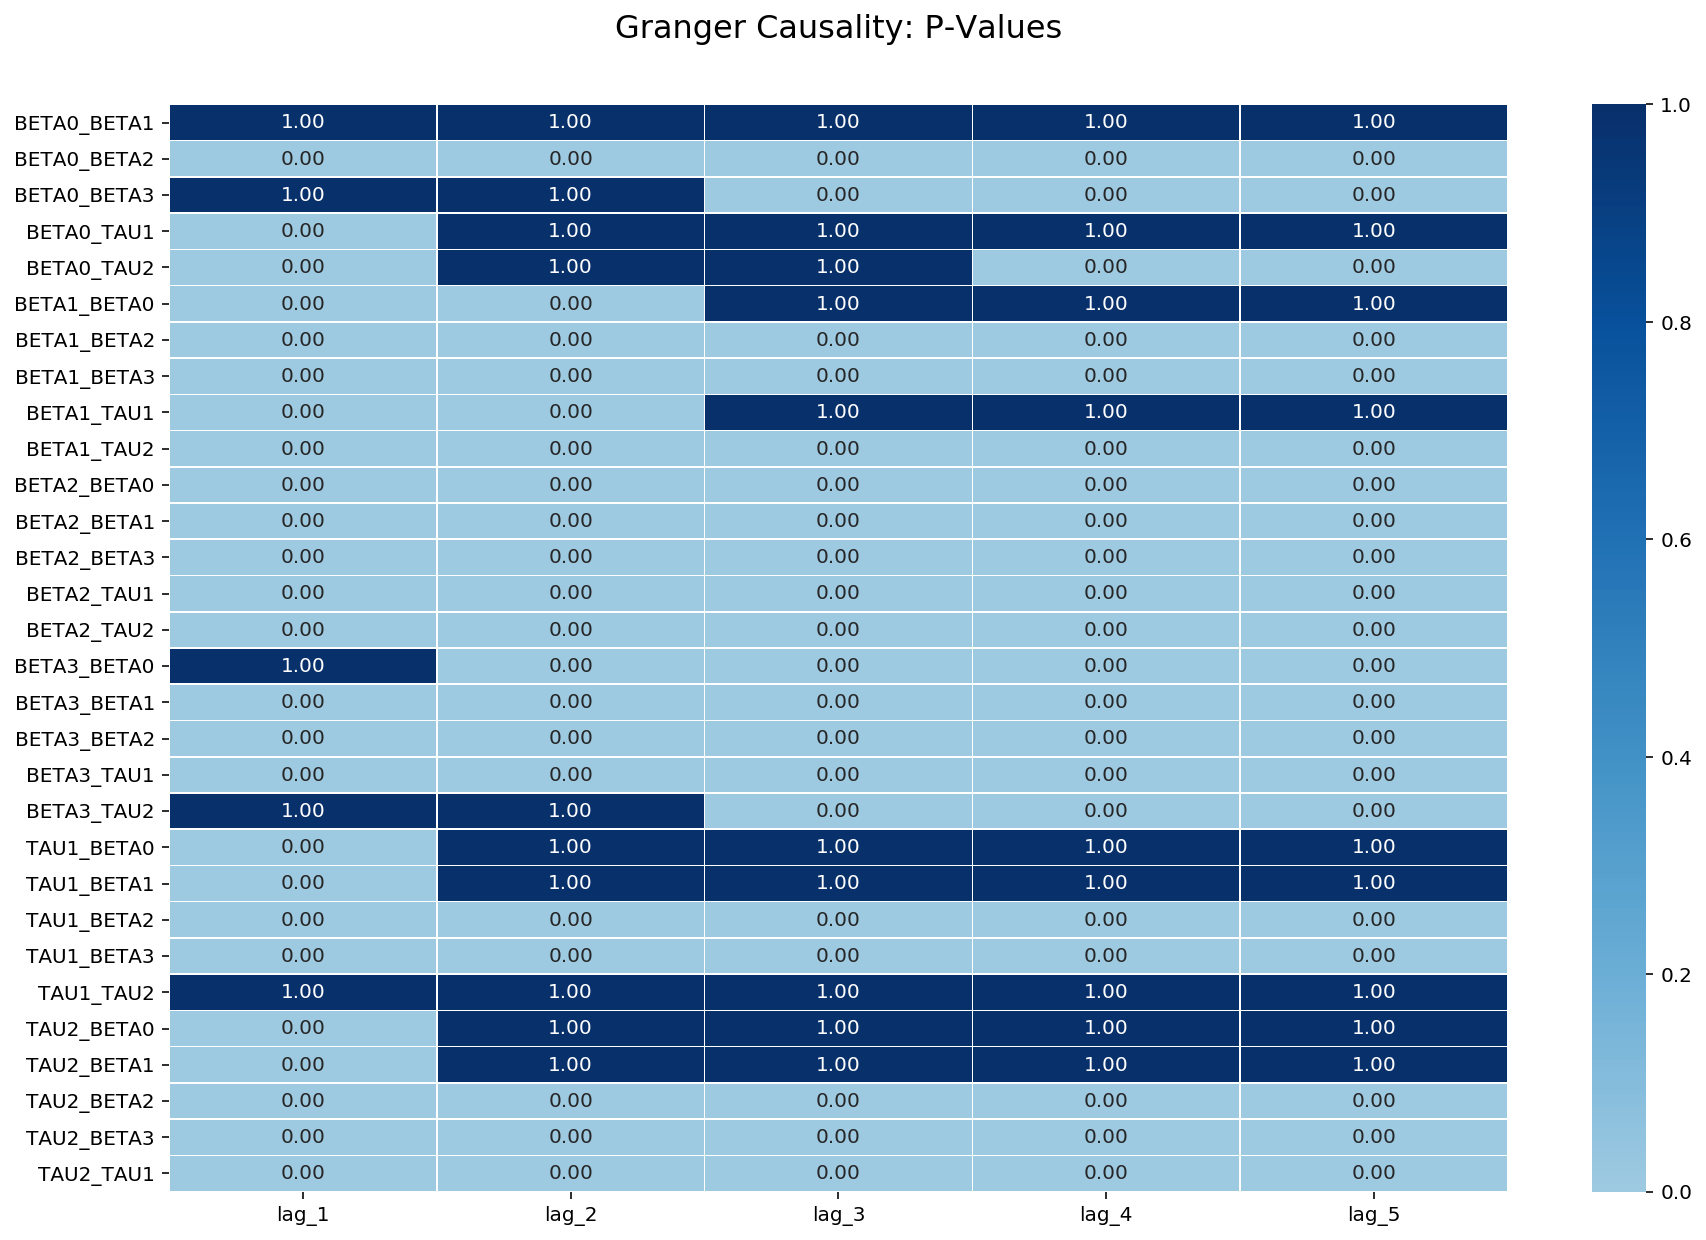

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))

plt.title("Granger Causality: P-Values", fontsize = 16)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(granger_df, 
            fmt=".2f", 
            cmap = "Blues", 
            linewidth = 0.3, 
            annot = True,
            center = 0.2)


plt.show()

### Cointegration
***

The cointegration of two time series signifies a long-term causal relationship between them. Statistically speaking, two time series are said to be co-integrated, when they are e.g. both I(1) but a linear combination of these two exists, that results in I(0). Thus, if such a I(0) linear combination of the time series can be found, they are co-integrated, which would be a promissing property for a VAR model.

- I(0) = Stationary series
- I(1) = Stationary series after differencing one time
- I(2) = Stationary series after differencing the differences..

In [33]:
def cointegration (col_1, col_2, alpha = "5%"):
    
    X_1 = sm.add_constant(nelson_siegel[col_1])
    X_2 = nelson_siegel[col_2]

    co_integ = sm.OLS(X_2, X_1).fit()
    beta = co_integ.params[1]
    indx = str(col_1)+str(col_2[1:])

    Z = X_2 - beta * X_1[col_1]
    Z = pd.DataFrame(Z, columns=[indx])
    
    return ad_fuller(df= Z, cols = [indx], confidence = alpha)

In [34]:
coint_df = pd.DataFrame()

for x,y in zip (comb_x,comb_y):
    new = cointegration(col_1 = x, col_2 = y, alpha = "5%")
    coint_df = pd.concat([coint_df, new], axis = 0)
    
coint_df

,adf_stat,p_val,result,crit_5%
BETA1ETA0,-1.267183,0.644049,non-stat,-2.862300
BETA2ETA0,-4.107520,0.000941,stat,-2.862297
BETA3ETA0,-4.419580,0.000274,stat,-2.862297
TAU1ETA0,-2.546352,0.104600,non-stat,-2.862297
TAU2ETA0,-3.264336,0.016550,stat,-2.862297
BETA0ETA1,-4.675973,0.000093,stat,-2.862300
BETA2ETA1,-5.903642,0.000000,stat,-2.862299
BETA3ETA1,-5.914219,0.000000,stat,-2.862299
TAU1ETA1,-4.803179,0.000054,stat,-2.862300
TAU2ETA1,-5.854877,0.000000,stat,-2.862299


### Model
***

#### Train-Test Yields

In [35]:
spot_train = spot[spot.index < pred_start]
spot_test = spot[spot.index >= pred_start]

In [36]:
# Train-set of actual spot rates
spot_train.iloc[:5,:5]

spot_day,3M,6M,1Y,2Y,3Y
2005-01-03,2.109629,2.151024,2.239782,2.430961,2.626467
2005-01-04,2.055906,2.115073,2.231982,2.457144,2.667102
2005-01-05,2.064858,2.126695,2.248179,2.479969,2.694019
2005-01-06,2.060515,2.107919,2.207488,2.415567,2.622265
2005-01-07,2.048016,2.092720,2.187889,2.390159,2.593648


In [37]:
# Test-set of actual spot rates
spot_test.iloc[:5,:5]

spot_day,3M,6M,1Y,2Y,3Y
2018-11-21,-0.716399,-0.721094,-0.708331,-0.620691,-0.486650
2018-11-22,-0.701830,-0.708536,-0.698949,-0.615093,-0.482586
2018-11-23,-0.684285,-0.696371,-0.695815,-0.624758,-0.500335
2018-11-26,-0.688142,-0.696975,-0.690841,-0.611624,-0.481964
2018-11-27,-0.690379,-0.701030,-0.698208,-0.624316,-0.498382


#### Train-Test Scores

In [38]:
train = nelson_siegel[nelson_siegel.index< pred_start]
test  = nelson_siegel[nelson_siegel.index>=pred_start]

if diff == "yes":
    X_train = train[cols_diff]
    X_test = test[cols_diff]

else:
    X_train = train[["BETA0","BETA1","TAU1","TAU2"]]
    X_test = test[["BETA0","BETA1","TAU1","TAU2"]]
    
last_train = train.iloc[-1,:len(cols)]
last_train

nelson_siegel_day
BETA0     1.496150
BETA1    -2.182218
BETA2    24.296865
BETA3   -26.541906
TAU1      2.830343
TAU2      2.779651
Name: 2018-11-20 00:00:00, dtype: float64

In [39]:
print (f"Train set: Dates range from {train.index[0].date()} to {train.index[-1].date()}")
train[cols].tail()

nelson_siegel_day,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
2018-11-14,1.510081,-2.183485,24.334831,-26.504568,2.797912,2.736448
2018-11-15,1.492527,-2.149531,24.272685,-26.566206,2.834866,2.771457
2018-11-16,1.497619,-2.155469,24.280355,-26.558533,2.834370,2.770777
2018-11-19,1.533341,-2.225948,24.307049,-26.531816,2.821177,2.770987
2018-11-20,1.496150,-2.182218,24.296865,-26.541906,2.830343,2.779651


In [40]:
print (f"Test set: Dates range from {test.index[0].date()} to {test.index[-1].date()}")
test[cols].head()

nelson_siegel_day,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
2018-11-21,1.509930,-2.212657,24.325195,-26.513546,2.823205,2.776651
2018-11-22,1.522251,-2.208067,24.313635,-26.525087,2.835567,2.785590
2018-11-23,1.463711,-2.125929,24.305968,-26.532646,2.843211,2.787966
2018-11-26,1.482206,-2.151886,24.332466,-26.506030,2.837764,2.783411
2018-11-27,1.482206,-2.152199,24.305796,-26.532672,2.853247,2.799169


#### AR-Model

<img src="../Images/6_ar_model.PNG">

In [41]:
pred_ar = pd.DataFrame()

for i in X_train.columns:
    model = AR(X_train[i].values)
    model_fitted = model.fit(maxlag = lag)
    
    pred = model_fitted.predict(start = len(X_train), 
                                end   = len(X_train) + steps - 1, 
                                dynamic = False)
    
    pred = pd.DataFrame(pred, columns = [i], index = spot_test.index[:steps])
    pred_ar = pd.concat([pred_ar, pred], axis = 1)
    
    print ("\n" + i)
    print (model_fitted.summary())

In [42]:
pred_ar.columns.name = "pred_spot_"+str(freq)
pred_ar.head()

pred_spot_day,BETA0,BETA1,TAU1,TAU2
2018-11-21,1.506152,-2.173935,2.834544,2.777714
2018-11-22,1.507922,-2.161023,2.839658,2.775379
2018-11-23,1.509941,-2.151299,2.844736,2.773144
2018-11-26,1.519201,-2.148682,2.848664,2.771952
2018-11-27,1.524980,-2.137336,2.853594,2.767455


#### VAR-Model

<img src="../Images/7_var_model.PNG">

In [43]:
var = VAR(X_train.values)

model_fitted = var.fit(lag)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 01, Jul, 2020
Time:                     16:14:31
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -14.6288
Nobs:                     3543.00    HQIC:                  -14.8126
Log likelihood:           6475.84    FPE:                3.33209e-07
AIC:                     -14.9145    Det(Omega_mle):     3.18222e-07
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.028971         0.011836            2.448           0.014
L1.y1          1.030868         0.034423           29.947           0.000
L1.y2          0.018639         0.026467            0.704           0.481
L1.y3          0.

In [44]:
pred_var = model_fitted.forecast(y = X_train[-lag:].values, steps = steps)
pred_var = pd.DataFrame(pred_var, columns = X_train.columns, index = spot_test.index[:steps])
pred_var.index = pd.to_datetime(pred_var.index)

print ("Prediction VAR-Model:")
pred_var

nelson_siegel_day,BETA0,BETA1,TAU1,TAU2
2018-11-21,1.499289,-2.181053,2.835403,2.788295
2018-11-22,1.494932,-2.171665,2.844362,2.787937
2018-11-23,1.487387,-2.163620,2.850574,2.790513
2018-11-26,1.490085,-2.164338,2.852208,2.793850
2018-11-27,1.489126,-2.155565,2.854682,2.796669


### Back-Transform
***

#### Nelson Siegel

In [45]:
# Select the model type -----------------------------------------------------------
if model == "var":
    pred_scores = pred_var    
else:
    pred_scores = pred_ar


# If differenced, convert I(1) back to I(0) ---------------------------------------
if diff == "yes":
    c=0
    
    for i,j in zip (cols_cum, cols_diff):
        pred_scores[i] = pred_scores[j].cumsum()

    for i,j in zip (cols, cols_cum):
        pred_scores[i] = pred_scores[j] + last_train[c]
        c=c+1

#pred_scores = pred_scores[cols]
pred_scores.columns.name = "pred_pc_"+str(freq)
pred_scores

pred_pc_day,BETA0,BETA1,TAU1,TAU2
2018-11-21,1.506152,-2.173935,2.834544,2.777714
2018-11-22,1.507922,-2.161023,2.839658,2.775379
2018-11-23,1.509941,-2.151299,2.844736,2.773144
2018-11-26,1.519201,-2.148682,2.848664,2.771952
2018-11-27,1.524980,-2.137336,2.853594,2.767455


In [46]:
pred_scores["BETA2"] = last_train["BETA2"]
pred_scores["BETA3"] = last_train["BETA3"]
pred_scores

pred_pc_day,BETA0,BETA1,TAU1,TAU2,BETA2,BETA3
2018-11-21,1.506152,-2.173935,2.834544,2.777714,24.296865,-26.541906
2018-11-22,1.507922,-2.161023,2.839658,2.775379,24.296865,-26.541906
2018-11-23,1.509941,-2.151299,2.844736,2.773144,24.296865,-26.541906
2018-11-26,1.519201,-2.148682,2.848664,2.771952,24.296865,-26.541906
2018-11-27,1.524980,-2.137336,2.853594,2.767455,24.296865,-26.541906


<img src="../Images/svenson.PNG">

In [47]:
pred_spot = pd.DataFrame(np.zeros([steps,len(tenors)]),
                         columns = tenors["MAT_STR"],
                         index = spot_test.index[:steps])


for i,j in enumerate (tenors["MAT_NUM"]):
    for k in range (0,steps,1):

        beta_0 = pred_scores["BETA0"].iloc[k]
        beta_1 = pred_scores["BETA1"].iloc[k]
        beta_2 = pred_scores["BETA2"].iloc[k]
        beta_3 = pred_scores["BETA3"].iloc[k]
        tau_1 = pred_scores["TAU1"].iloc[k]
        tau_2 = pred_scores["TAU2"].iloc[k]
        
        term_1 = (1-np.exp(-j/tau_1))/(j/tau_1)
        term_2 = ((1-np.exp(-j/tau_1))/(j/tau_1))-np.exp(-j/tau_1)
        term_3 = ((1-np.exp(-j/tau_2))/(j/tau_2))-np.exp(-j/tau_2)
        pred_spot.iloc[k,i] = beta_0 + beta_1*term_1 + beta_2*term_2 + beta_3*term_3

pred_spot.iloc[:5,:5]

MAT_STR,3M,6M,1Y,2Y,3Y
2018-11-21,-0.689283,-0.700620,-0.698150,-0.622329,-0.492796
2018-11-22,-0.677920,-0.691928,-0.693208,-0.620411,-0.490495
2018-11-23,-0.669302,-0.685807,-0.690543,-0.620351,-0.489772
2018-11-26,-0.659423,-0.677504,-0.684350,-0.615481,-0.484054
2018-11-27,-0.646293,-0.667552,-0.678747,-0.612980,-0.480446


#### Naive Model

In [48]:
naive = pd.DataFrame(spot_train.iloc[-1,:]).T
naive = pd.concat([naive]*steps, ignore_index=True)
naive.index = spot_test.index[:steps]

naive.columns.name = "naive_spot_"+str(freq)
naive.iloc[:5,:5]

naive_spot_day,3M,6M,1Y,2Y,3Y
2018-11-21,-0.704928,-0.714155,-0.708767,-0.630748,-0.501773
2018-11-22,-0.704928,-0.714155,-0.708767,-0.630748,-0.501773
2018-11-23,-0.704928,-0.714155,-0.708767,-0.630748,-0.501773
2018-11-26,-0.704928,-0.714155,-0.708767,-0.630748,-0.501773
2018-11-27,-0.704928,-0.714155,-0.708767,-0.630748,-0.501773


### Model Evaluation
***

#### Results

In [49]:
spot_test.columns.name = "test_spot_"+str(freq)
spot_test.iloc[:steps,:5]

test_spot_day,3M,6M,1Y,2Y,3Y
2018-11-21,-0.716399,-0.721094,-0.708331,-0.620691,-0.486650
2018-11-22,-0.701830,-0.708536,-0.698949,-0.615093,-0.482586
2018-11-23,-0.684285,-0.696371,-0.695815,-0.624758,-0.500335
2018-11-26,-0.688142,-0.696975,-0.690841,-0.611624,-0.481964
2018-11-27,-0.690379,-0.701030,-0.698208,-0.624316,-0.498382


In [50]:
pred_spot.columns.name = "pred_spot_"+str(freq)
pred_spot.iloc[:5,:5]

pred_spot_day,3M,6M,1Y,2Y,3Y
2018-11-21,-0.689283,-0.700620,-0.698150,-0.622329,-0.492796
2018-11-22,-0.677920,-0.691928,-0.693208,-0.620411,-0.490495
2018-11-23,-0.669302,-0.685807,-0.690543,-0.620351,-0.489772
2018-11-26,-0.659423,-0.677504,-0.684350,-0.615481,-0.484054
2018-11-27,-0.646293,-0.667552,-0.678747,-0.612980,-0.480446


#### Error

In [51]:
error_act = pred_spot - spot_test.iloc[:steps,:]
error_act.index = error_act.index.date
error_act.columns.name = "err_act_"+freq
error_act.iloc[:5,:5]

err_act_day,3M,6M,1Y,2Y,3Y
2018-11-21,0.027115,0.020474,0.010180,-0.001638,-0.006147
2018-11-22,0.023909,0.016608,0.005742,-0.005318,-0.007909
2018-11-23,0.014983,0.010564,0.005272,0.004407,0.010564
2018-11-26,0.028719,0.019471,0.006491,-0.003857,-0.002091
2018-11-27,0.044086,0.033478,0.019461,0.011335,0.017936


In [52]:
error_naive = naive - spot_test.iloc[:steps,:]
error_naive.index = error_naive.index.date
error_naive.columns.name = "err_naive_"+freq
error_naive.iloc[:5,:5]

err_naive_day,3M,6M,1Y,2Y,3Y
2018-11-21,0.011470,0.006939,-0.000437,-0.010057,-0.015124
2018-11-22,-0.003099,-0.005619,-0.009818,-0.015655,-0.019188
2018-11-23,-0.020644,-0.017784,-0.012953,-0.005990,-0.001438
2018-11-26,-0.016786,-0.017180,-0.017927,-0.019123,-0.019810
2018-11-27,-0.014549,-0.013125,-0.010560,-0.006432,-0.003391


In [53]:
mae_act    = pd.Series([abs(error_act.iloc[i,:]).mean() for i in range(steps)])
mae_naive  = pd.Series([abs(error_naive.iloc[i,:]).mean() for i in range(steps)])

err = pd.concat([mae_act, mae_naive], axis = 1)
err.columns = ["mae_act", "mae_naive"]
err.index = pred_spot.index

err

,mae_act,mae_naive
2018-11-21,0.005773,0.013861
2018-11-22,0.006353,0.021266
2018-11-23,0.042215,0.013387
2018-11-26,0.035711,0.011698
2018-11-27,0.062941,0.006584


In [54]:
file_object = open("../Data/nelson_siegel_results.txt", "a")
file_object.write(str(err))
file_object.close()

#### Visual

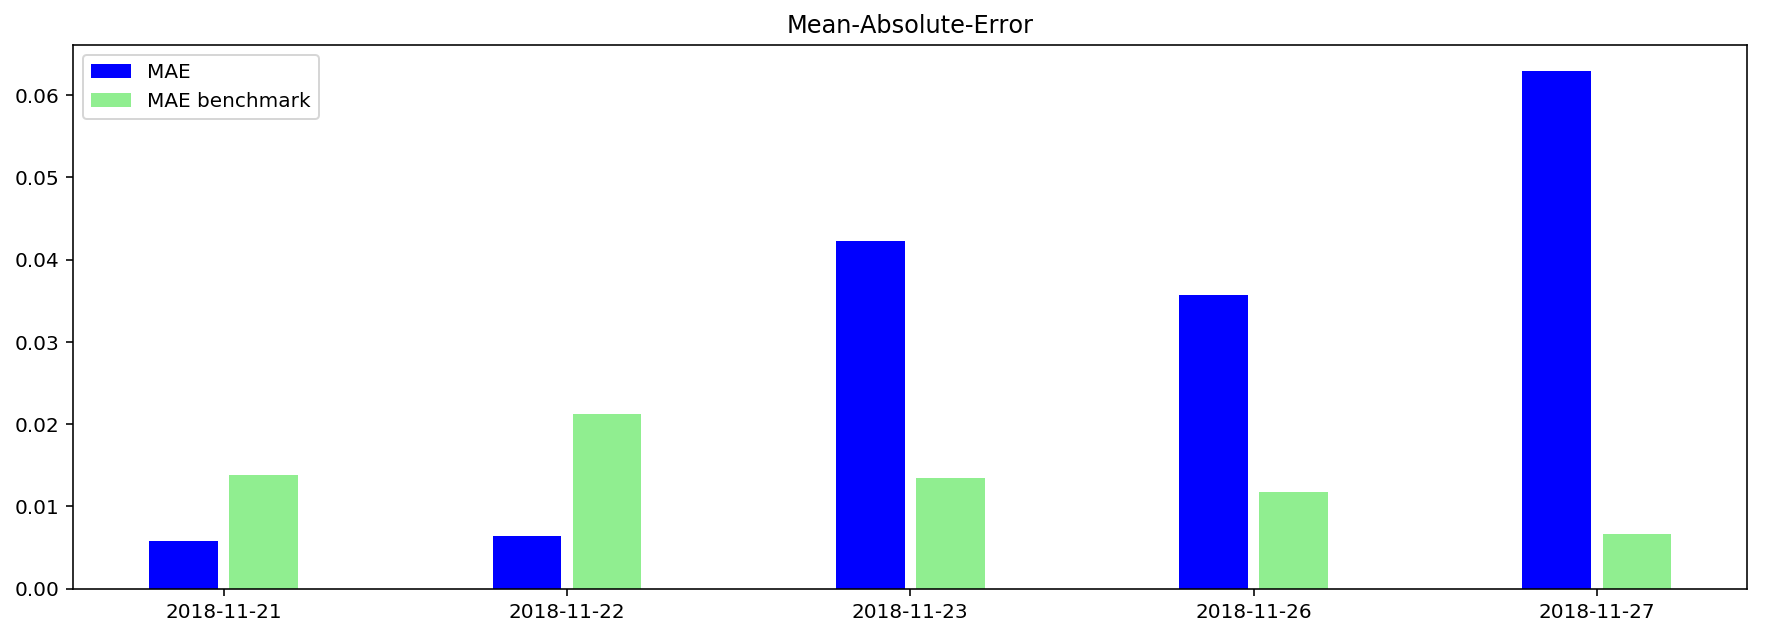

In [55]:
# Helper -------------------------------------------------------------------------------------------
indx = np.arange(err.shape[0])
bar_width = 0.2


# Chart --------------------------------------------------------------------------------------------
fig, ax = plt.subplots(1,1, figsize = [15,5])

ax.bar(indx - 0.05 - bar_width/3, err["mae_act"], bar_width, color = "blue", label = "MAE")
ax.bar(indx + 0.05 + bar_width/3, err["mae_naive"], bar_width, color = "lightgreen", label = "MAE benchmark")

ax.set_title("Mean-Absolute-Error")
ax.set_xticks(indx)
ax.set_xticklabels(err.index.date)
ax.legend()

plt.show()

### Visualization
***

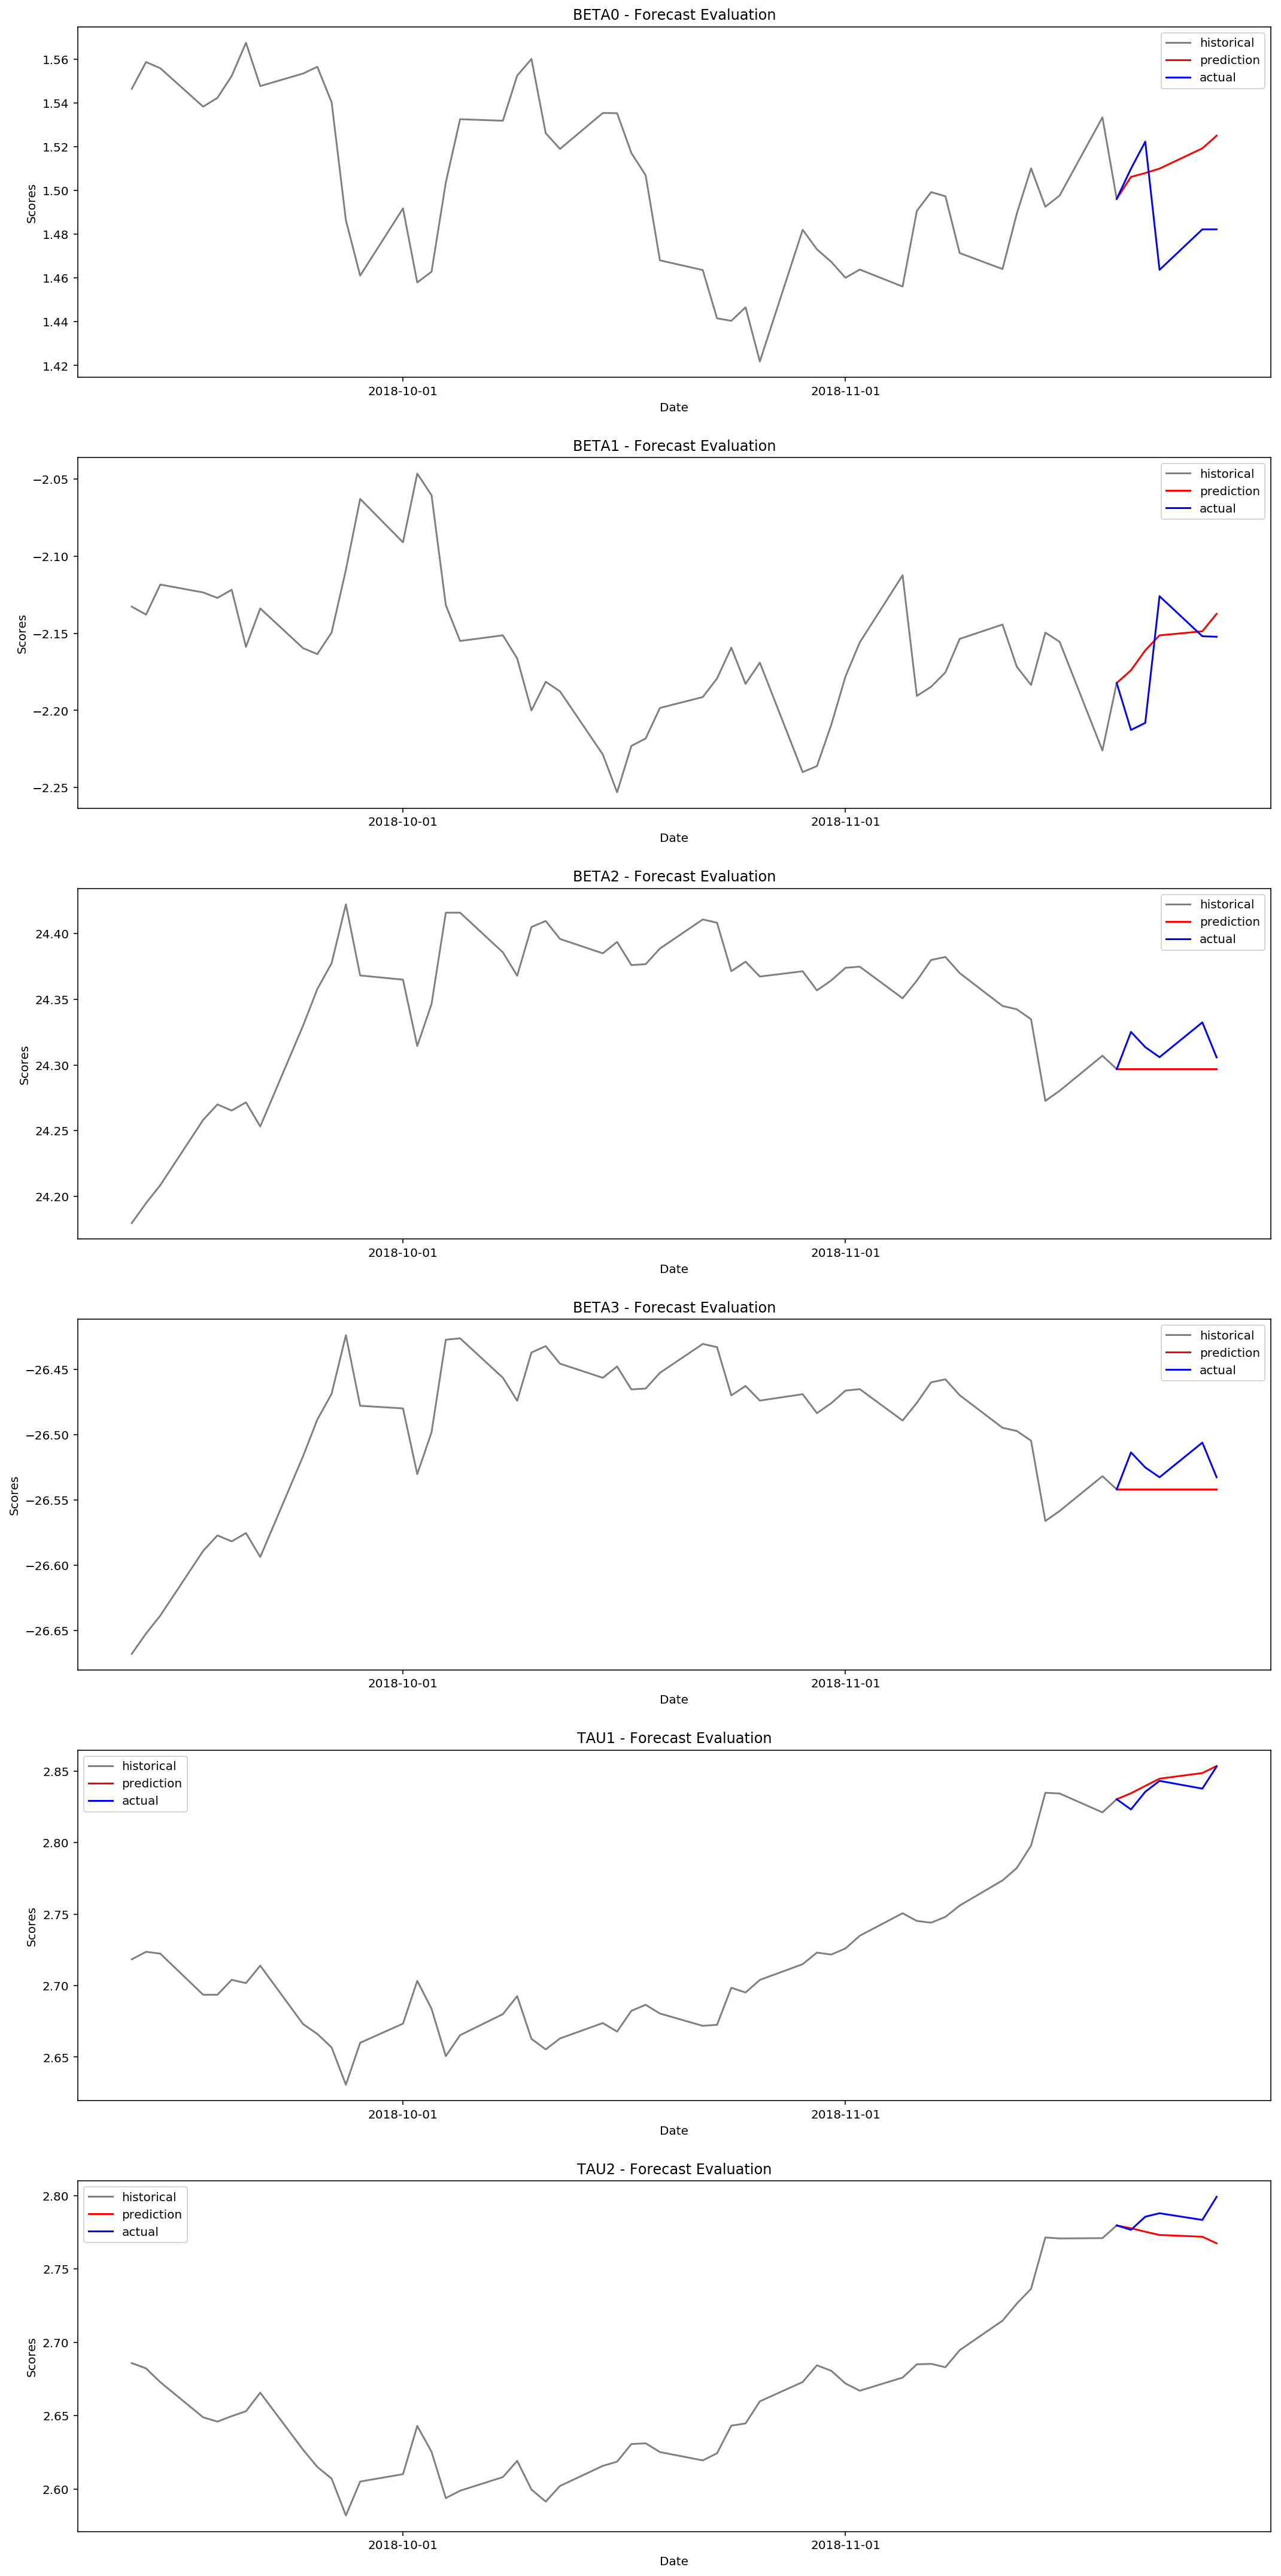

In [56]:
days_hist = 50

fig, ax = plt.subplots(cols_len, 1, figsize = (15,5*cols_len))

chart_hist = train.iloc[-days_hist:,:]
chart_pred = pd.concat([train.iloc[-1:], pred_scores], axis =0)
chart_act = pd.concat([train.iloc[-1:], test[:steps]], axis = 0)

for i,j in enumerate (cols):
    # Plots --------------------------------------------------------------
    ax[i].plot (chart_hist[j], c="grey", label = "historical")
    ax[i].plot (chart_pred[j], c="red", label = "prediction")
    ax[i].plot (chart_act[j], c="blue", label = "actual")

    # Format -------------------------------------------------------------
    ax[i].set_title (j+" - Forecast Evaluation")
    ax[i].set_xlabel ("Date")
    ax[i].set_ylabel ("Scores")

    ax[i].xaxis.set_major_formatter(days_fmt)
    ax[i].xaxis.set_major_locator(months)
    ax[i].legend()

plt.tight_layout(h_pad=2.0)
plt.show()

In [57]:
maturities = ["1Y", "5Y", "10Y"]

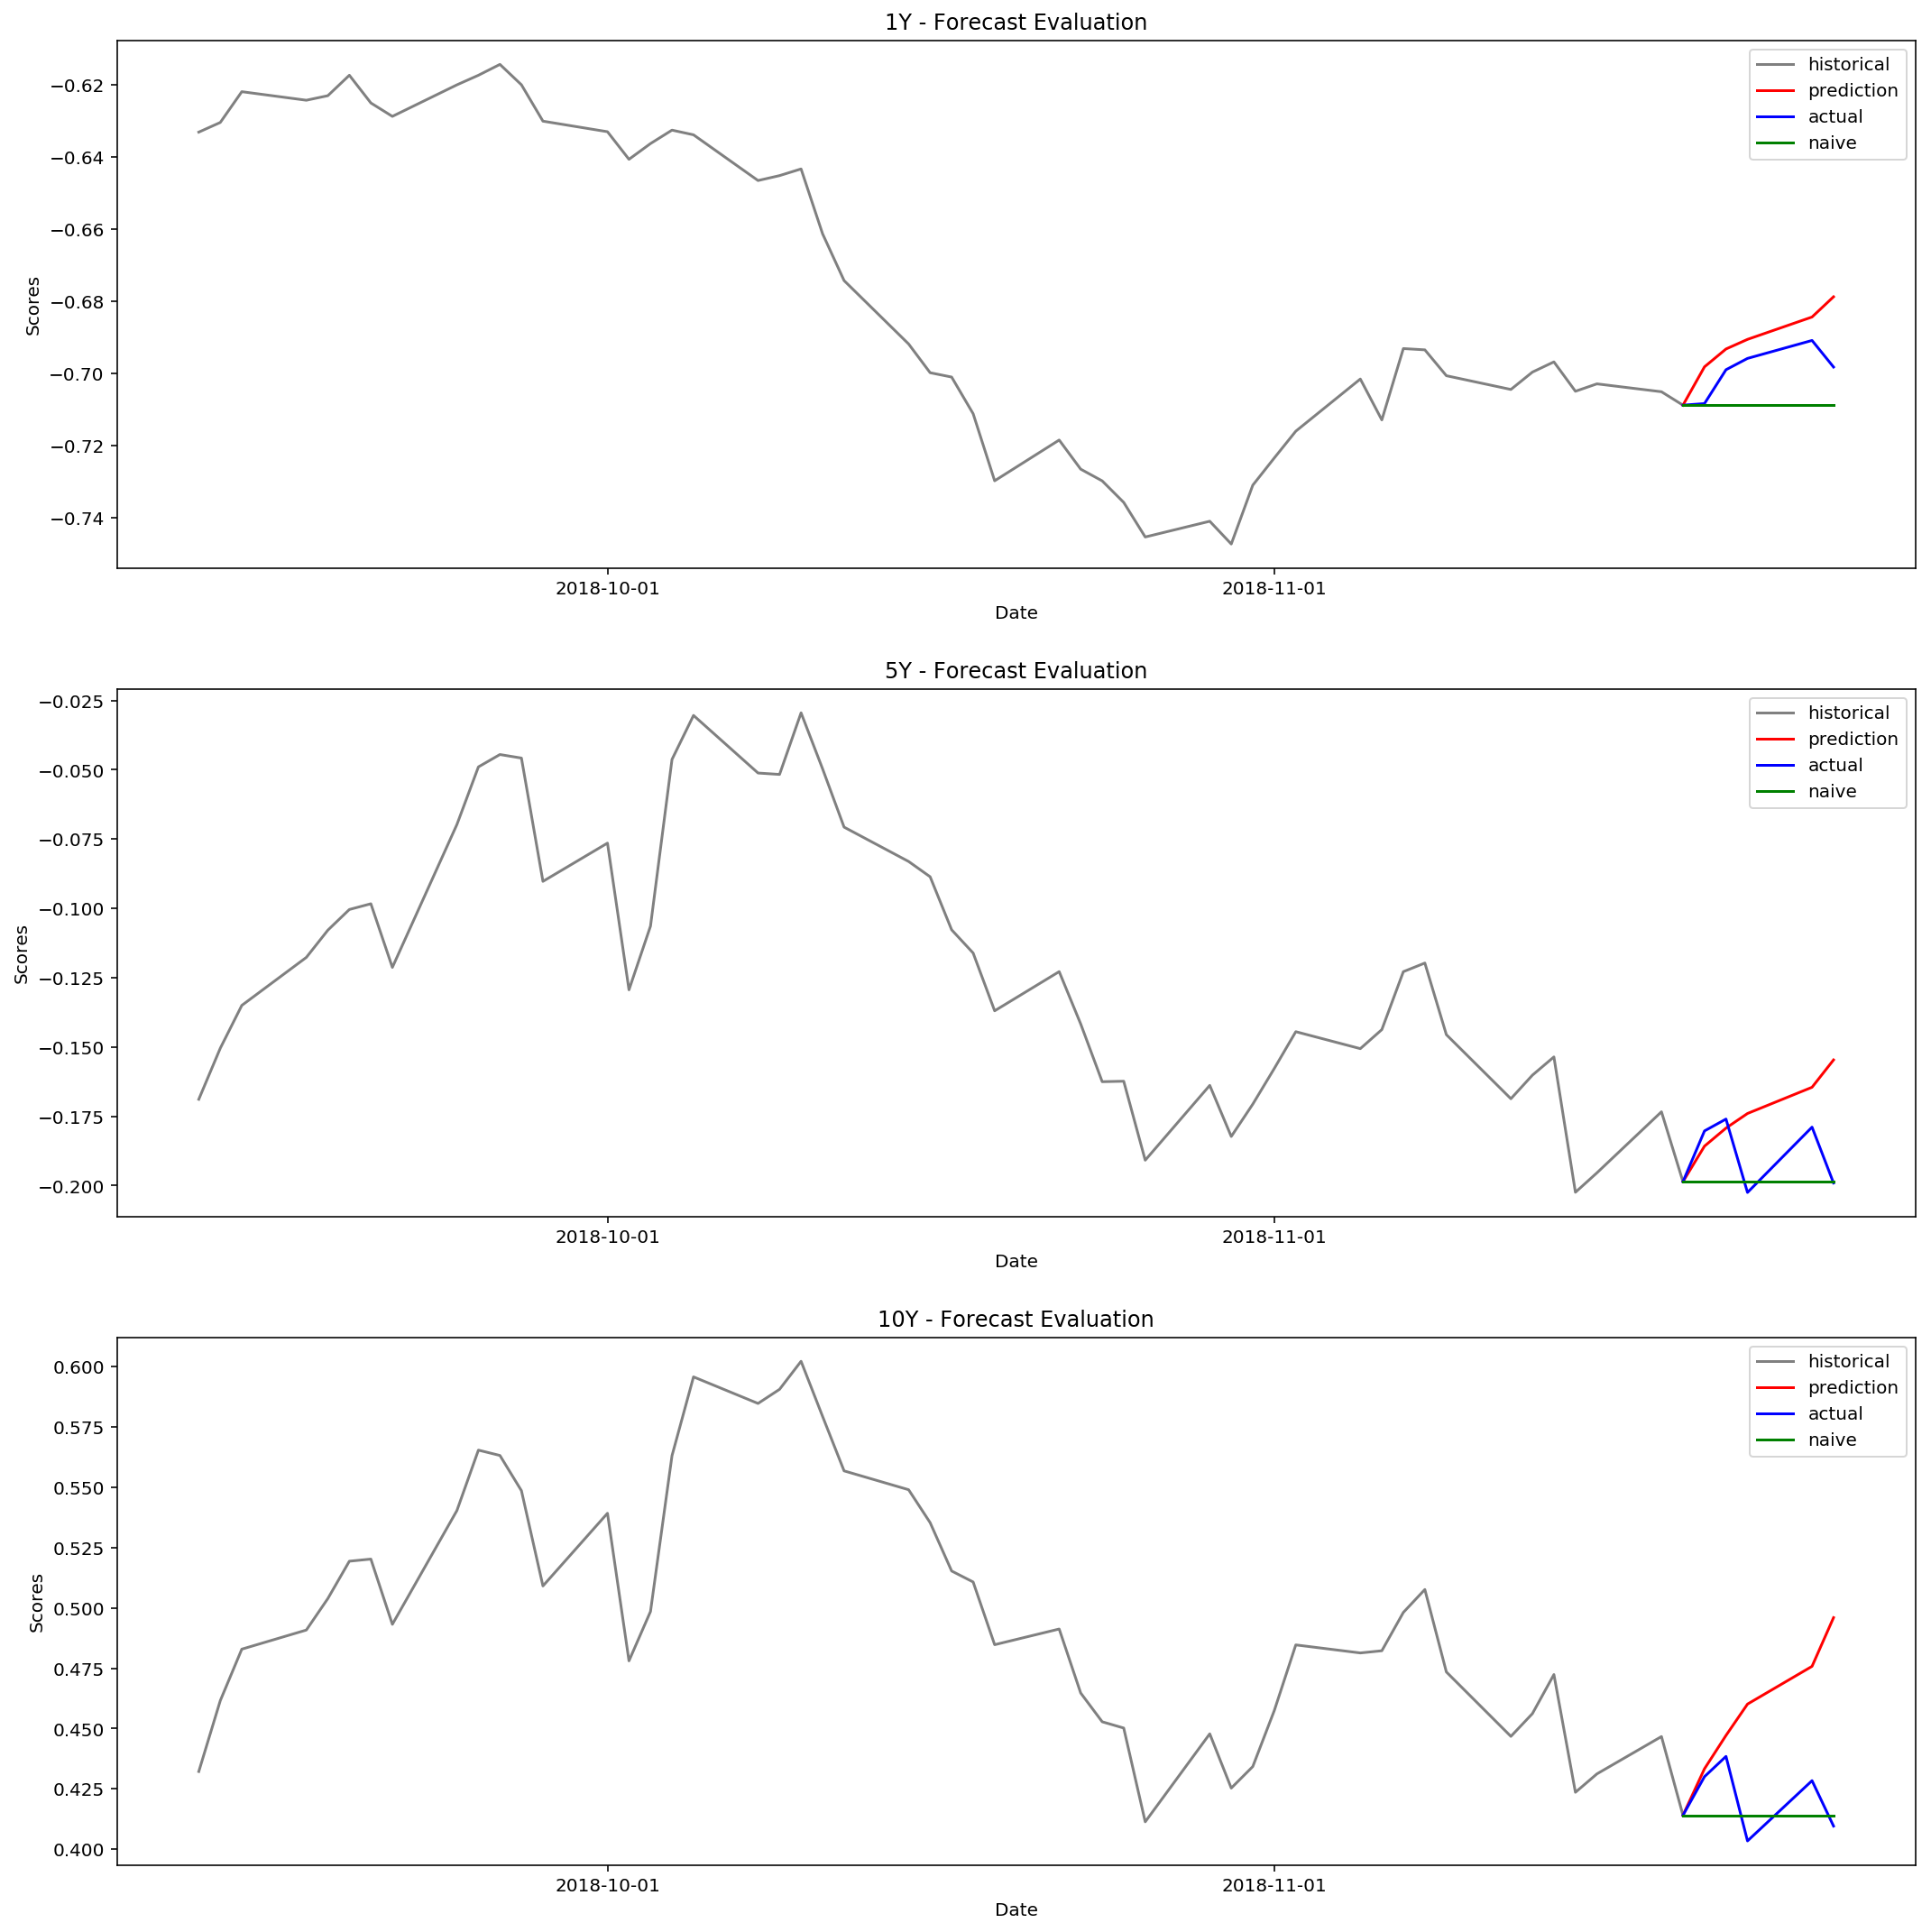

In [58]:
days_hist = 50

fig, ax = plt.subplots(len(maturities), 1, figsize = (15,5*len(maturities)))

chart_hist = spot_train.iloc[-days_hist:,:]
chart_pred = pd.concat([spot_train.iloc[-1:], pred_spot], axis =0)
chart_act = pd.concat([spot_train.iloc[-1:], spot_test[:steps]], axis = 0)
chart_naive = pd.concat([spot_train.iloc[-1:], naive], axis = 0)

for i,j in enumerate (maturities):
    # Plots --------------------------------------------------------------
    ax[i].plot (chart_hist[j], c="grey", label = "historical")
    ax[i].plot (chart_pred[j], c="red", label = "prediction")
    ax[i].plot (chart_act[j], c="blue", label = "actual")
    ax[i].plot (chart_naive[j], c="green", label = "naive")

    # Format -------------------------------------------------------------
    ax[i].set_title (j+" - Forecast Evaluation")
    ax[i].set_xlabel ("Date")
    ax[i].set_ylabel ("Scores")

    ax[i].xaxis.set_major_formatter(days_fmt)
    ax[i].xaxis.set_major_locator(months)
    ax[i].legend()

plt.tight_layout(h_pad=2.0)
plt.show()

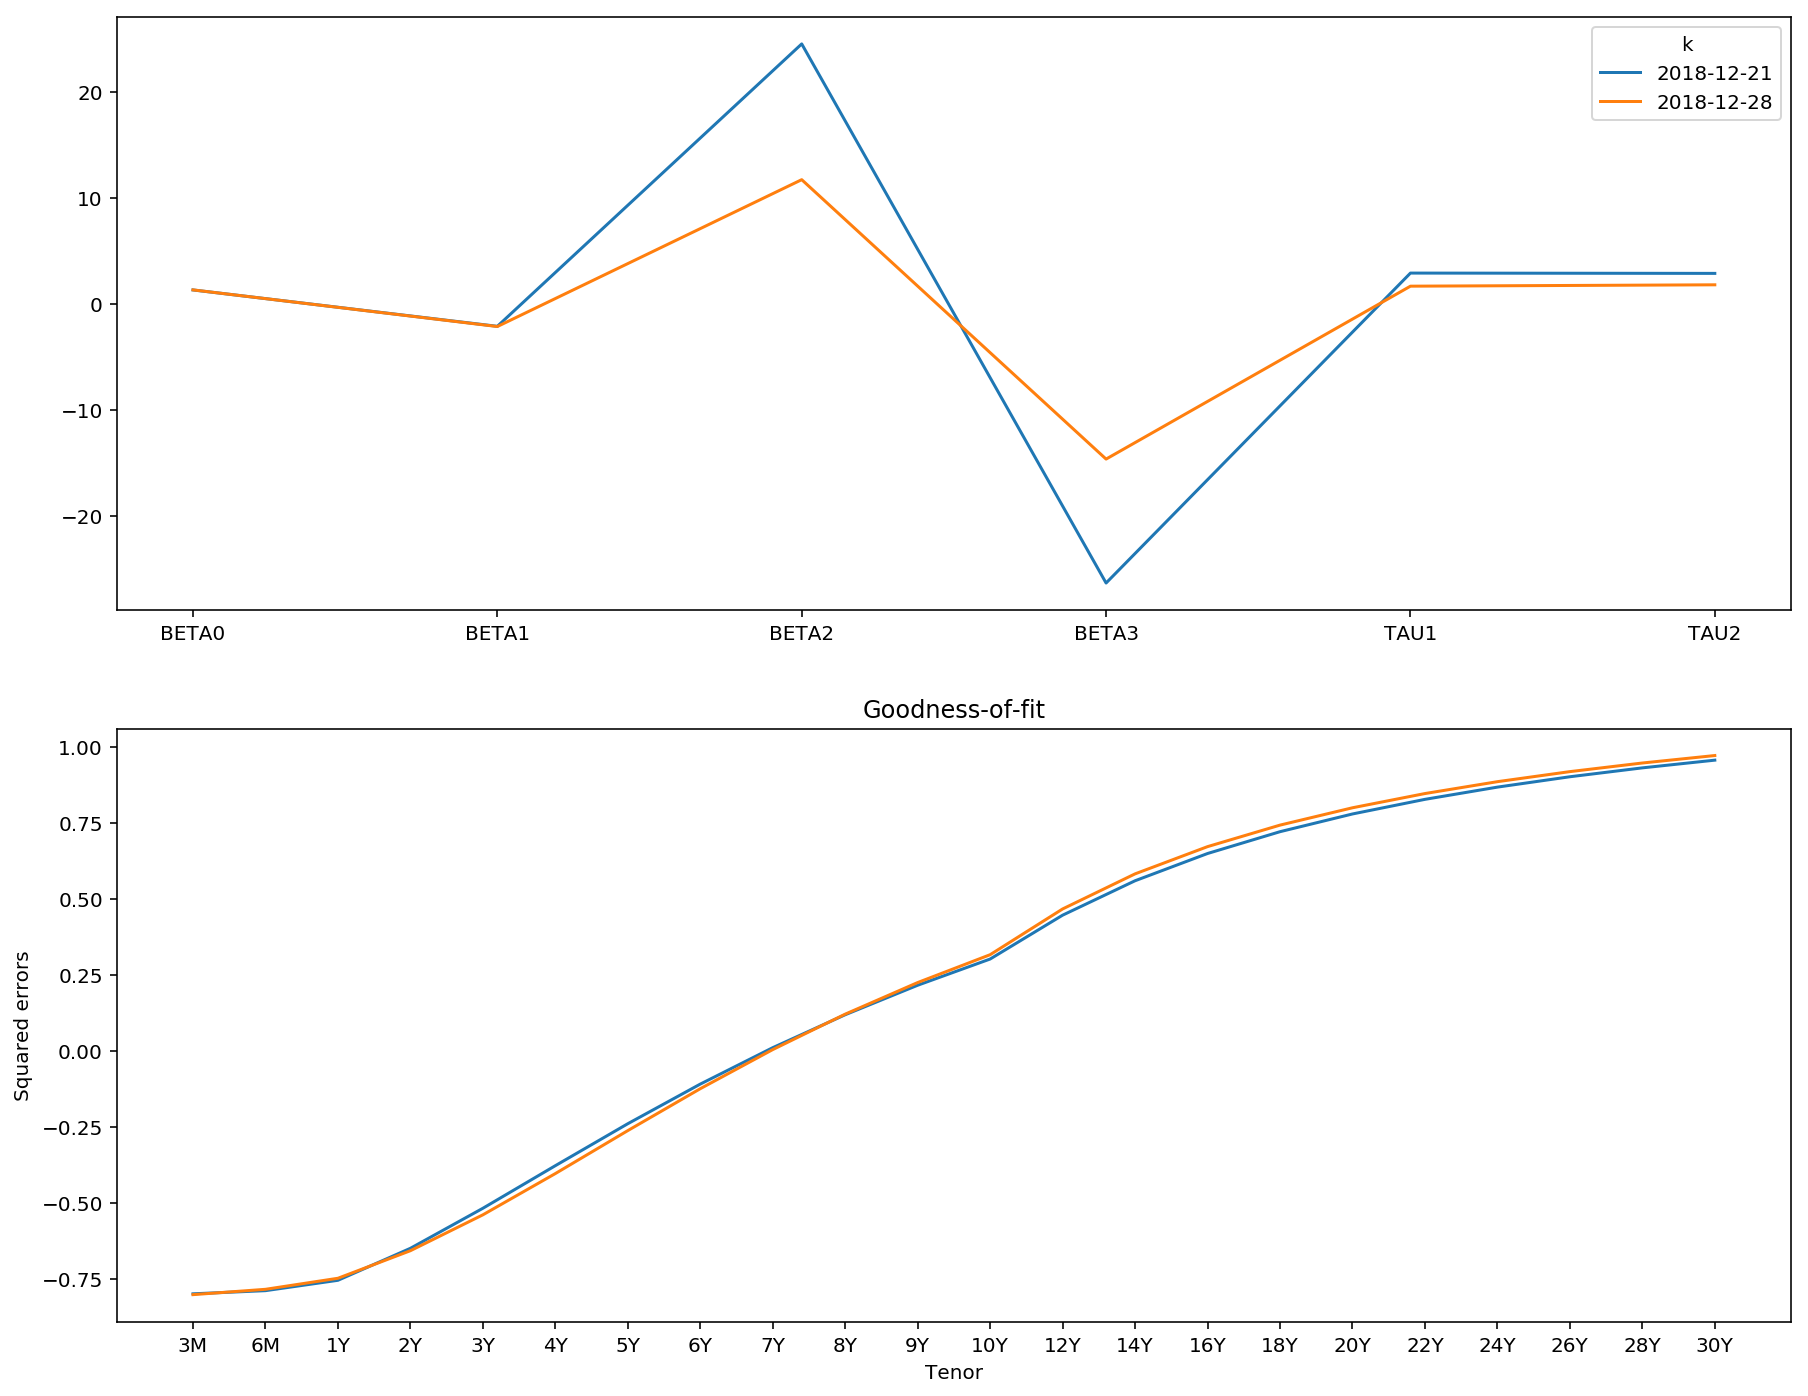

In [111]:
date_1 = "2018-12-21"
date_2 = "2018-12-28"

fig_3, ax = plt.subplots(2, 1, figsize = (15,12))

ax[0].plot(nelson_siegel.loc[date_1][:6], label = date_1)
ax[0].plot(nelson_siegel.loc[date_2][:6], label = date_2)

ax[1].plot(spot_test.loc[date_1], label = date_1)
ax[1].plot(spot_test.loc[date_2], label = date_2)


ax[1].set_xlabel("Tenor")
ax[1].set_ylabel("Squared errors")
ax[1].set_title(f"Goodness-of-fit")

ax[0].legend(title = "k")
plt.show()